## Introduction

Food delivery services have become increasingly popular in recent years, offering a convenient way for customers to enjoy their favorite meals without leaving the comfort of their own homes. However, one of the biggest challenges that these services should be predicting accurate delivery times. This is where food delivery duration prediction comes in.

Accurately predicting delivery times is crucial for both customers and businesses. Customers want to know when their food will arrive so they can plan their day accordingly, while businesses need to ensure that their deliveries are timely in order to maintain customer satisfaction and loyalty. 

## Problem Statement

The aim of this problem is to develop a model that can accurately predict the delivery time of food orders from restaurants. The prediction should take into account various factors that means relevant variables that affect the delivery time.Here we have historical data about food deliveries, including information about Delivery Person age,Delivery person ratings,location cordinates, traffic conditions ,vehicle condition,weather condition ,multiple deliveries and type of city, the goal is to build a predictive model that can accurately estimate the delivery time for new food orders.

## Data

##### Variables

It consists of 45593 observations and 20 variables.

##### 1.ID 
 Represent Order ID.
##### 2.Delivery_person_ID
Represent ID of a Delivery person.
##### 3.Delivery_person_Age
Represent age of a delivery person.
##### 4.Delivery_person_Ratings
Represent the rating is given by customer.
##### 5.Restaurant_latitude
Represent the latitude co-ordinates of restaurant.
##### 6.Restaurant_longitude
Represent the longitude co-ordinates of restaurant.
##### 7.Delivery_location_latitude
Represent latitude co-ordinates of delivery location.
##### 8.Delivery_location_longitude
Represent longitude of delivery location.
##### 9.Order_Date
Represent on which date the order is placed.
##### 10.Time_Orderd
Represent on which time the order is placed.
##### 11.Time_Order_picked
Represent on which time the order is picked up.
##### 12.Weatherconditions
Represent the different types of weather conditions.('conditions Sunny','conditions Stormy','conditions Sandstorms','conditions Cloudy','conditions Fog','conditions Windy').
##### 13.Road_traffic_density
Represent various road traffic like High,Jam,Low,Medium.
##### 14.Vehicle_condition
Represent 
 0 indicates Excellent condition.
 1 represents a good condition. 
 2 represent a fair or average condition. 
 3 represent poor condition.
##### 15.Type_of_order
Different type of order are 'Snack ' 'Drinks ' 'Buffet ' 'Meal '.
##### 16.Type_of_vehicle
Different type of vehicle are 'motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle '.
##### 17.multiple_deliveries -  
1)During your first order pickup, if there's another order at a restaurant nearby, you'll get a notification. Feel free to accept or decline the second order.
2)If you accept the second order, you'll have access to suggested directions to that restaurant location for pickup.
3)Once you've completed your first delivery, you can head to the second delivery location to finish your multi-restaurant trip.
##### 18.Festival
Whether there is festival is present or not.
##### 19.City
Different types of city are 'Urban ' 'Metropolitian ' 'Semi-Urban.
##### 20.Time_taken(min)
represent the time taken by the delivery person.

### Importing the Necessary Libraries

In [1]:
#Basics libraries

import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   
from sklearn.linear_model import LinearRegression      
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

### Loading the Dataset

In [4]:
train_data=pd.read_csv("train.csv")

In [5]:
#show top 5 records
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [6]:
#show bottom 5 records
train_data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26
45592,0x5fb2,RANCHIRES09DEL02,23,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10:00,17:15:00,conditions Fog,Medium,2,Snack,scooter,1,No,Metropolitian,(min) 36


In [7]:
#show rows and columns
train_data.shape

(45593, 20)

Total number of rows=45593.

Total number of columns=20.

### Now will Load Test Dataset

In [8]:
test_data=pd.read_csv("test.csv")
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [9]:
#show rows and columns
test_data.shape

(11399, 19)

### EDA [Exploratory Data Analysis]

In [10]:
#check for duplicated records

train_data[train_data.duplicated()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


In [11]:
#check for null values 

train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [12]:
#checking for how data are given

for i in train_data.columns:
    print("column name=",i,"\n")
    print("\n",train_data[i].unique(),"\n")
    print("\n","column data type=",train_data[i].dtype,"\n")
    print("Number of unique column=",train_data[i].nunique(),"\n")
    print("---------------------------------------------------------------------")

column name= ID 


 ['0x4607 ' '0xb379 ' '0x5d6d ' ... '0x4f8d ' '0x5eee ' '0x5fb2 '] 


 column data type= object 

Number of unique column= 45593 

---------------------------------------------------------------------
column name= Delivery_person_ID 


 ['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 '] 


 column data type= object 

Number of unique column= 1320 

---------------------------------------------------------------------
column name= Delivery_person_Age 


 ['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50'] 


 column data type= object 

Number of unique column= 23 

---------------------------------------------------------------------
column name= Delivery_person_Ratings 


 ['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3'] 


In [13]:
train_data=train_data.replace('NaN',np.nan,regex=True)  #it indicates that the replacement operation is performed using regular expressions
train_data.isnull().sum()                               #RegEx can be used to check if a string contains the specified search pattern.

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

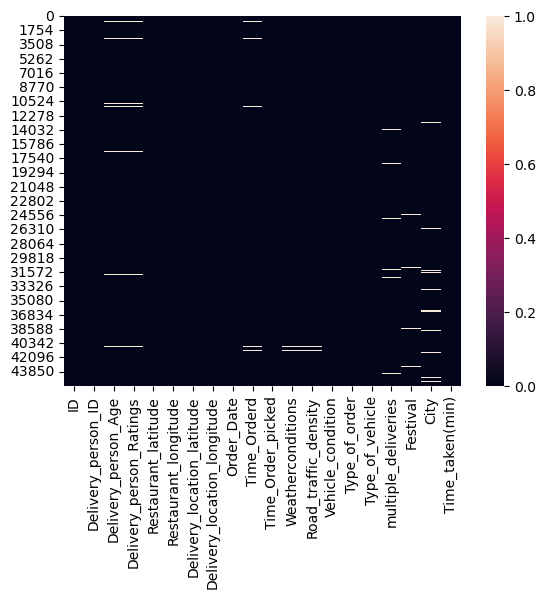

In [15]:
#show heatmap
sns.heatmap(train_data.isnull())
plt.show()

### Lets impute our missing values

In [16]:
train_data[train_data["Time_Orderd"].isnull()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaN,18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,(min) 33
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaN,15:30:00,NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,(min) 19
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaN,18:25:00,NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaN,23:40:00,conditions Stormy,Low,2,Snack,scooter,0,No,NaN,(min) 19
179,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaN,17:50:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,0,No,Metropolitian,(min) 43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45405,0xc7ed,KNPRES20DEL03,NaN,NaN,26.470000,80.350000,26.610000,80.490000,12-02-2022,NaN,19:25:00,conditions Windy,Jam,1,Drinks,scooter,1,No,Metropolitian,(min) 18
45504,0x461,BANGRES07DEL02,NaN,NaN,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,NaN,09:30:00,NaN,NaN,3,Meal,scooter,1,No,NaN,(min) 24
45518,0x863,INDORES05DEL01,NaN,NaN,22.727021,75.884167,22.737021,75.894167,19-03-2022,NaN,11:40:00,NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25
45519,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaN,09:05:00,NaN,NaN,3,Meal,electric_scooter,1,No,Urban,(min) 17


In [17]:
#Define a function 

def calculate_time_diff(df):                                    
    df["Time_Orderd"] = pd.to_timedelta(df["Time_Orderd"])      
    df["Time_Order_picked"] = pd.to_timedelta(df["Time_Order_picked"])
    df["Order_prepare_time"] = (df["Time_Order_picked"]-df["Time_Orderd"]).dt.total_seconds() / 60
    
    
calculate_time_diff(train_data)

pd.to_timedelta is s used to convert the values in the "Time_Orderd" and "Time_Order_picked" columns of the DataFrame (df) into pandas Timedelta objects.

Reason for converting these columns to Timedelta objects is to enable calculations and manipulations involving time durations.

In [18]:
#shows frequency of unique obeservation

train_data["Order_prepare_time"].value_counts()

 5.0       14564
 10.0      14288
 15.0      14179
-1425.0      431
-1430.0      261
-1435.0      139
Name: Order_prepare_time, dtype: int64

In [19]:
pd.set_option("display.max_columns",None)
train_data[train_data["Order_prepare_time"].isin([-1425,-1430,-1435])]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time
75,0x4b7f,HYDRES13DEL03,26,4.7,17.431477,78.400350,17.491477,78.460350,05-03-2022,0 days 23:50:00,0 days 00:05:00,conditions Fog,Low,1,Buffet,motorcycle,0,No,Metropolitian,(min) 10,-1425.0
101,0x3185,HYDRES19DEL03,25,4.8,17.458998,78.500366,17.488998,78.530366,26-03-2022,0 days 23:55:00,0 days 00:10:00,conditions Cloudy,Low,1,Snack,scooter,1,No,Urban,(min) 19,-1425.0
164,0x51e4,VADRES18DEL01,30,4.1,0.000000,0.000000,0.070000,0.070000,04-04-2022,0 days 23:50:00,0 days 00:00:00,conditions Fog,Low,0,Snack,motorcycle,0,No,Metropolitian,(min) 43,-1430.0
166,0x1dac,CHENRES07DEL03,33,4.5,13.081878,80.248519,13.171878,80.338519,04-03-2022,0 days 23:45:00,0 days 00:00:00,conditions Stormy,Low,2,Drinks,electric_scooter,1,No,Metropolitian,(min) 19,-1425.0
325,0x26d4,HYDRES05DEL03,32,4.9,17.433809,78.386744,17.523809,78.476744,18-03-2022,0 days 23:55:00,0 days 00:10:00,conditions Sandstorms,Low,1,Buffet,scooter,1,No,Metropolitian,(min) 24,-1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45246,0x14ca,JAPRES03DEL03,28,4.1,26.913483,75.803139,26.943483,75.833139,07-03-2022,0 days 23:50:00,0 days 00:00:00,conditions Windy,Low,0,Buffet,motorcycle,0,No,Metropolitian,(min) 21,-1430.0
45361,0x6a9b,SURRES16DEL01,26,4.9,21.160437,72.774209,21.270437,72.884209,31-03-2022,0 days 23:50:00,0 days 00:05:00,conditions Cloudy,Low,0,Snack,motorcycle,0,No,Metropolitian,(min) 21,-1425.0
45529,0x1889,HYDRES01DEL02,26,4.5,17.410371,78.437225,17.540371,78.567225,25-03-2022,0 days 23:50:00,0 days 00:05:00,conditions Fog,Low,0,Buffet,motorcycle,0,No,Metropolitian,(min) 24,-1425.0
45535,0x3781,JAPRES13DEL03,35,4.9,26.846156,75.802300,26.876156,75.832300,09-03-2022,0 days 23:50:00,0 days 00:00:00,conditions Sunny,Low,1,Snack,scooter,0,No,Urban,(min) 17,-1430.0


In [20]:
train_data["Order_prepare_time"].replace({-1425.0: 15.0, -1430.0: 10.0,-1435.0: 5.0}  , inplace=True)

In [21]:
train_data[train_data["Order_prepare_time"].isnull()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,06-04-2022,NaT,0 days 18:35:00,conditions Cloudy,Medium,1,Drinks,scooter,1,No,Metropolitian,(min) 33,NaN
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,11-03-2022,NaT,0 days 15:30:00,NaN,NaN,1,Drinks,scooter,0,No,Metropolitian,(min) 19,NaN
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,02-04-2022,NaT,0 days 18:25:00,NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25,NaN
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,09-03-2022,NaT,0 days 23:40:00,conditions Stormy,Low,2,Snack,scooter,0,No,NaN,(min) 19,NaN
179,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,12-03-2022,NaT,0 days 17:50:00,conditions Sandstorms,Medium,0,Drinks,motorcycle,0,No,Metropolitian,(min) 43,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45405,0xc7ed,KNPRES20DEL03,NaN,NaN,26.470000,80.350000,26.610000,80.490000,12-02-2022,NaT,0 days 19:25:00,conditions Windy,Jam,1,Drinks,scooter,1,No,Metropolitian,(min) 18,NaN
45504,0x461,BANGRES07DEL02,NaN,NaN,-12.978453,-77.643685,12.998453,77.663685,17-03-2022,NaT,0 days 09:30:00,NaN,NaN,3,Meal,scooter,1,No,NaN,(min) 24,NaN
45518,0x863,INDORES05DEL01,NaN,NaN,22.727021,75.884167,22.737021,75.894167,19-03-2022,NaT,0 days 11:40:00,NaN,NaN,3,Snack,electric_scooter,0,No,Metropolitian,(min) 25,NaN
45519,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,13-02-2022,NaT,0 days 09:05:00,NaN,NaN,3,Meal,electric_scooter,1,No,Urban,(min) 17,NaN


In [22]:
#shows all obeservation with only two column

train_data.loc[:,["Type_of_order","Order_prepare_time"]]

,Type_of_order,Order_prepare_time
0,Snack,15.0
1,Snack,5.0
2,Drinks,15.0
3,Buffet,10.0
4,Snack,15.0
...,...,...
45588,Meal,10.0
45589,Buffet,15.0
45590,Drinks,15.0
45591,Snack,5.0


In [23]:
train_data.groupby("Type_of_order")[["Order_prepare_time"]].describe()

Order_prepare_time                                             \
                           count       mean       std  min  25%   50%   75%   
Type_of_order                                                                 
Buffet                   10856.0  10.026713  4.105834  5.0  5.0  10.0  15.0   
Drinks                   10897.0   9.957787  4.073262  5.0  5.0  10.0  15.0   
Meal                     11018.0   9.959158  4.085983  5.0  5.0  10.0  15.0   
Snack                    11091.0  10.013975  4.085127  5.0  5.0  10.0  15.0   

                     
                max  
Type_of_order        
Buffet         15.0  
Drinks         15.0  
Meal           15.0  
Snack          15.0

### Impute Order_prepare_time

In [24]:
train_data["Order_prepare_time"].fillna(10.0,inplace=True)

In [25]:
train_data[train_data["Order_prepare_time"].isnull()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time


Here I have imputed all the null values present in Order_prepare_time column.

In [26]:
#Now drop "Time_Orderd","Time_Order_picked" column
train_data.drop(columns=["Time_Orderd","Time_Order_picked"],axis=1,inplace=True)

In [27]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,15.0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,5.0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,15.0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,10.0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,15.0


In [28]:
train_data.shape

(45593, 19)

In [29]:
train_data.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
Order_prepare_time                0
dtype: int64

###   change the Datatype And Impute null values 

### Delivery_person_Age

In [30]:
train_data["Delivery_person_Age"].dtype

dtype('O')

In [31]:
train_data["Delivery_person_Age"]=train_data["Delivery_person_Age"].astype(float)

<AxesSubplot:xlabel='Delivery_person_Age'>

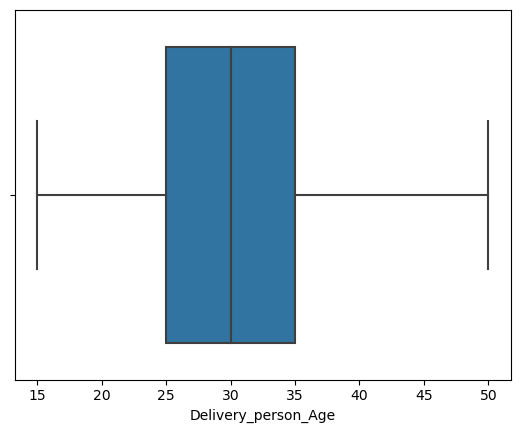

In [32]:
sns.boxplot(train_data["Delivery_person_Age"])

In [33]:
round(train_data["Delivery_person_Age"].mean())

30

In [34]:
train_data["Delivery_person_Age"]=train_data["Delivery_person_Age"].fillna(round(train_data["Delivery_person_Age"].mean()))

<AxesSubplot:xlabel='Delivery_person_Age'>

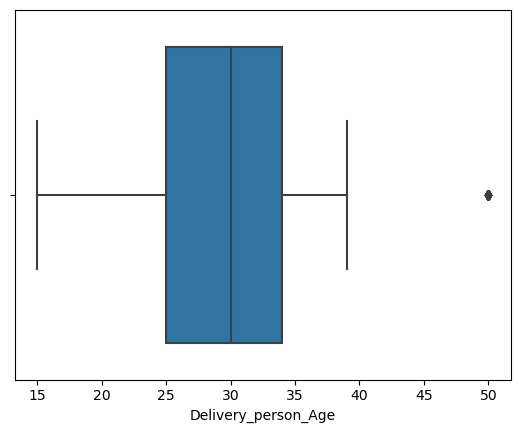

In [35]:
sns.boxplot(train_data["Delivery_person_Age"])

#### Let's see the 50 age group records

In [36]:
train_data[train_data["Delivery_person_Age"]>40]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time
3586,0x46d,BANGRES05DEL01,50.0,6,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 25,10.0
4714,0x493,HYDRES17DEL01,50.0,6,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 27,10.0
5169,0x4f2,JAPRES08DEL01,50.0,6,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20,10.0
5362,0x430,BANGRES19DEL01,50.0,6,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,NaN,3,Meal,electric_scooter,1,No,Metropolitian,(min) 18,10.0
5651,0xbef1,AGRRES13DEL02,50.0,6,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,(min) 20,10.0
6394,0x427,JAPRES06DEL02,50.0,6,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,NaN,3,Meal,electric_scooter,0,No,Urban,(min) 20,10.0
7031,0x3eb,MYSRES15DEL02,50.0,6,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,NaN,3,Buffet,scooter,1,No,Metropolitian,(min) 14,10.0
7681,0xd42,VADRES09DEL01,50.0,6,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 22,10.0
9499,0x3f0,BANGRES010DEL01,50.0,6,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,NaN,3,Drinks,scooter,1,No,Urban,(min) 17,10.0
9535,0x3ef,RANCHIRES13DEL01,50.0,6,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,NaN,3,Snack,bicycle,1,No,Metropolitian,(min) 32,10.0


#### This age group is a outlier and food_delivery company also don't want to hire also such older people for their service.so i am going to drop these records.

In [37]:
above_age_40_idx=train_data[train_data["Delivery_person_Age"]>40].index
above_age_40_idx

Int64Index([ 3586,  4714,  5169,  5362,  5651,  6394,  7031,  7681,  9499,
             9535, 10100, 10737, 12297, 13257, 13652, 14106, 14907, 14944,
            16798, 17145, 17708, 18977, 19382, 20269, 21320, 22416, 23375,
            24237, 24918, 25285, 26052, 27221, 27399, 28315, 28974, 29535,
            30579, 30943, 31233, 32326, 33533, 34688, 38007, 38020, 38561,
            38649, 39699, 40223, 41105, 41969, 42072, 42835, 45332],
           dtype='int64')

In [38]:
train_data.drop(above_age_40_idx,axis=0,inplace=True)

In [39]:
train_data.reset_index(drop=True,inplace=True)

In [40]:
train_data[train_data["Delivery_person_Age"]>40]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time


<AxesSubplot:xlabel='Delivery_person_Age'>

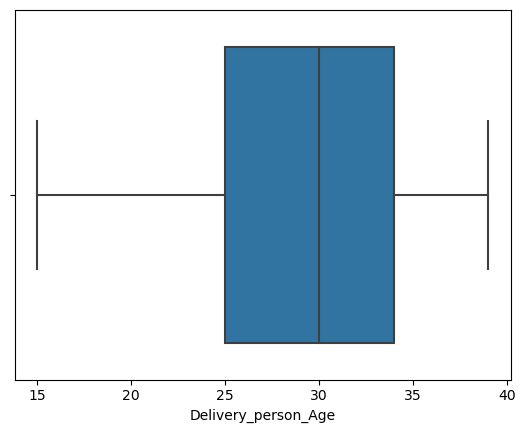

In [41]:
sns.boxplot(train_data["Delivery_person_Age"])

### Delivery_person_Ratings

In [42]:
train_data["Delivery_person_Ratings"].dtype

dtype('O')

In [43]:
train_data["Delivery_person_Ratings"]=train_data["Delivery_person_Ratings"].astype(float)

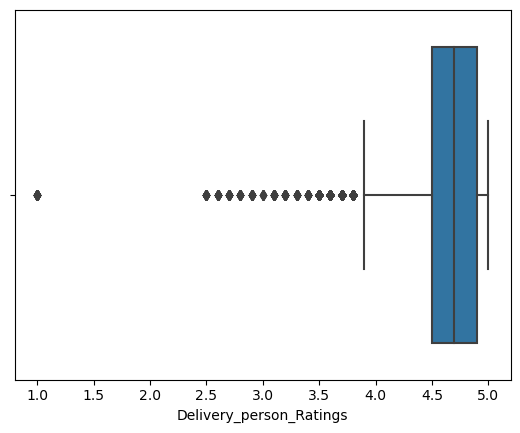

In [44]:
sns.boxplot(train_data["Delivery_person_Ratings"])
plt.show()

In [45]:
train_data["Delivery_person_Ratings"].median()

4.7

In [46]:
train_data["Delivery_person_Ratings"]=train_data["Delivery_person_Ratings"].fillna(train_data["Delivery_person_Ratings"].median())

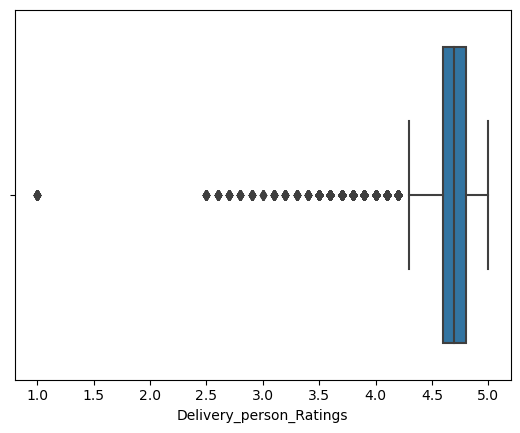

In [47]:
sns.boxplot(train_data["Delivery_person_Ratings"])
plt.show()

#### Here there is a extreme outlier.Let's see what kind of outlier it is

In [48]:
train_data[train_data["Delivery_person_Ratings"]<2.0]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time
2387,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,12-03-2022,NaN,NaN,3,Meal,motorcycle,0,No,Urban,(min) 15,10.0
2905,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,03-04-2022,NaN,NaN,3,Snack,scooter,1,No,Metropolitian,(min) 29,10.0
2951,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,21-03-2022,NaN,NaN,3,Buffet,bicycle,1,No,Metropolitian,(min) 20,10.0
5897,0x474,CHENRES15DEL03,15.0,1.0,13.026286,80.275235,13.056286,80.305235,11-03-2022,NaN,NaN,3,Drinks,bicycle,1,No,Metropolitian,(min) 25,10.0
9148,0x73f,BANGRES05DEL01,15.0,1.0,12.970324,77.645748,13.080324,77.755748,25-03-2022,NaN,NaN,3,Buffet,motorcycle,2,No,Metropolitian,(min) 34,10.0
10888,0x1b49,MUMRES14DEL02,15.0,1.0,19.181300,72.836191,19.231300,72.886191,30-03-2022,NaN,NaN,3,Buffet,motorcycle,1,No,Metropolitian,(min) 39,10.0
11113,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,05-03-2022,NaN,NaN,3,Meal,scooter,1,No,Urban,(min) 27,10.0
12081,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,24-03-2022,NaN,NaN,3,Buffet,bicycle,0,No,Metropolitian,(min) 28,10.0
15106,0x18b0,RANCHIRES02DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,16-03-2022,NaN,NaN,3,Meal,bicycle,1,No,Metropolitian,(min) 21,10.0
15909,0x550,CHENRES08DEL02,15.0,1.0,13.022394,80.242439,13.072394,80.292439,11-03-2022,NaN,NaN,3,Snack,bicycle,0,No,Metropolitian,(min) 17,10.0


#### Here data have 15 age person which is unrealistic.A company don't want to give their delivery service by below 18 persons or age group and also person have got 1.0 rating. so for model prediction we have to drop this kind of records.

In [49]:
below_18_age_idx=train_data[train_data["Delivery_person_Age"]==15].index
below_18_age_idx

Int64Index([ 2387,  2905,  2951,  5897,  9148, 10888, 11113, 12081, 15106,
            15909, 16066, 16444, 21198, 22266, 23009, 23461, 23617, 23637,
            25843, 26602, 26886, 27087, 27909, 27970, 29628, 31178, 31920,
            33158, 34911, 35979, 37058, 37634, 39027, 39036, 40237, 41192,
            44351, 44829],
           dtype='int64')

In [50]:
train_data.drop(below_18_age_idx,axis=0,inplace=True)

In [51]:
train_data.reset_index(drop=True,inplace=True)

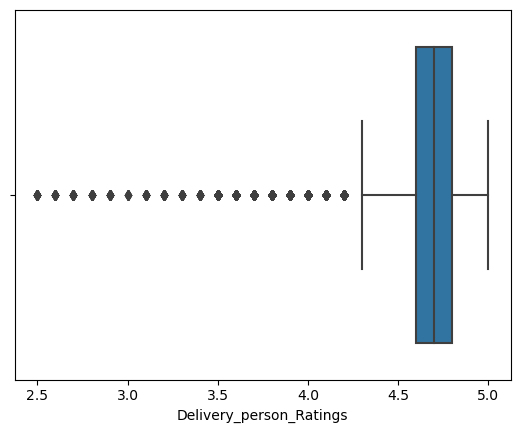

In [52]:
sns.boxplot(train_data["Delivery_person_Ratings"])
plt.show()

Here there is no extreme outlier present in the dataset.

In [53]:
train_data.shape

(45502, 19)

### Weathercondition

In [54]:
train_data["Weatherconditions"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy', nan],
      dtype=object)

In [55]:
train_data["Weatherconditions"].mode()[0]

'conditions Fog'

In [56]:
train_data["Weatherconditions"]=train_data["Weatherconditions"].fillna(train_data["Weatherconditions"].mode()[0])

In [57]:
train_data["Weatherconditions"]=train_data["Weatherconditions"].apply(lambda x:x.split()[-1])

In [58]:
train_data["Weatherconditions"].value_counts()

Fog           8179
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weatherconditions, dtype: int64

### Road_traffic_density

In [59]:
train_data["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [60]:
train_data["Road_traffic_density"].mode()[0]

'Low '

In [61]:
train_data["Road_traffic_density"]=train_data["Road_traffic_density"].fillna(train_data["Road_traffic_density"].mode()[0])

In [62]:
train_data["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [63]:
train_data["Road_traffic_density"]=train_data["Road_traffic_density"].str.strip()

In [64]:
#check
train_data["Road_traffic_density"].unique()

array(['High', 'Jam', 'Low', 'Medium'], dtype=object)

### multiple_deliveries 

In [65]:
train_data["multiple_deliveries"].value_counts()

1    28109
0    14057
2     1982
3      361
Name: multiple_deliveries, dtype: int64

In [66]:
train_data["multiple_deliveries"].mode()[0]

'1'

In [67]:
train_data["multiple_deliveries"]=train_data["multiple_deliveries"].fillna(train_data["multiple_deliveries"].mode()[0])

### Festival

In [68]:
train_data["Festival"].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [69]:
train_data["Festival"]=train_data["Festival"].str.strip()

In [70]:
train_data["Festival"].mode()[0]

'No'

In [71]:
train_data["Festival"]=train_data["Festival"].fillna(train_data["Festival"].mode()[0])

In [72]:
train_data["Festival"].unique()

array(['No', 'Yes'], dtype=object)

### City

In [73]:
train_data["City"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [74]:
train_data["City"]=train_data["City"].str.strip()

In [75]:
train_data["City"].mode()[0]

'Metropolitian'

In [76]:
train_data["City"]=train_data["City"].fillna(train_data["City"].mode()[0])

In [77]:
train_data["City"].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban'], dtype=object)

In [78]:
train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
Order_prepare_time             0
dtype: int64

Successfully imputed all the null values.

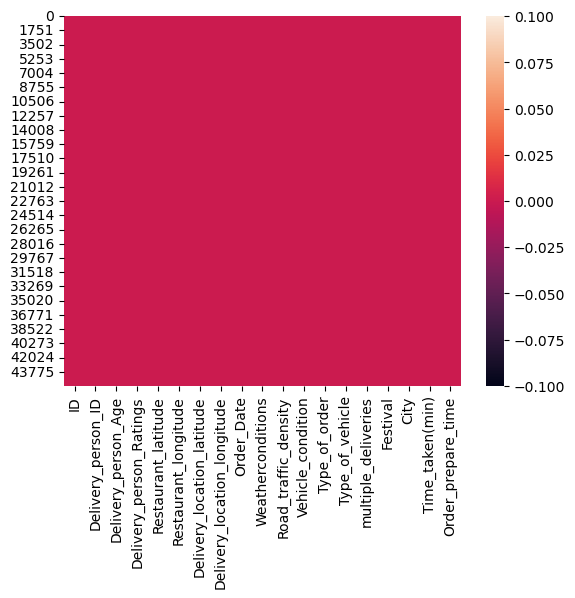

In [79]:
# Let's check it through heatmap
sns.heatmap(train_data.isnull())
plt.show()

In [80]:
train_data.shape

(45502, 19)

### Feature Engineering

### target Variable=Time_taken(min)

In [81]:
train_data["Time_taken(min)"]

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45497    (min) 32
45498    (min) 36
45499    (min) 16
45500    (min) 26
45501    (min) 36
Name: Time_taken(min), Length: 45502, dtype: object

In [82]:
train_data["Time_taken(min)"]=train_data["Time_taken(min)"].apply(lambda x:float(x.split(" ")[-1]))

In [83]:
train_data["Time_taken(min)"].unique()

array([24., 33., 26., 21., 30., 40., 32., 34., 46., 23., 20., 41., 15.,
       36., 39., 18., 38., 47., 12., 22., 25., 35., 10., 19., 11., 28.,
       52., 16., 27., 49., 17., 14., 37., 44., 42., 31., 13., 29., 50.,
       43., 48., 54., 53., 45., 51.])

### Delivery_person_ID

In [84]:
#check the data to know how the data look like
train_data["Delivery_person_ID"]

0          INDORES13DEL02 
1          BANGRES18DEL02 
2          BANGRES19DEL01 
3         COIMBRES13DEL02 
4          CHENRES12DEL01 
               ...        
45497       JAPRES04DEL01 
45498       AGRRES16DEL01 
45499      CHENRES08DEL03 
45500     COIMBRES11DEL01 
45501    RANCHIRES09DEL02 
Name: Delivery_person_ID, Length: 45502, dtype: object

In [85]:
train_data["Delivery_person_ID"].unique()

array(['INDORES13DEL02 ', 'BANGRES18DEL02 ', 'BANGRES19DEL01 ', ...,
       'KOCRES04DEL01 ', 'BHPRES06DEL03 ', 'GOARES03DEL03 '], dtype=object)

In [86]:
train_data["Delivery_person_ID"]=train_data["Delivery_person_ID"].str.strip()

In [87]:
train_data["City_code"]=train_data["Delivery_person_ID"].apply(lambda x: x.split("RES")[0])

In [88]:
train_data.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG


In [89]:
train_data["City_code"].value_counts()

JAP       3439
RANCHI    3222
BANG      3184
SUR       3182
HYD       3177
MUM       3168
MYS       3164
COIMB     3162
VAD       3159
INDO      3154
CHEN      3132
PUNE      3129
AGR        761
LUDH       758
ALH        738
KNP        737
DEH        735
GOA        709
AURG       703
KOC        701
KOL        699
BHP        689
Name: City_code, dtype: int64

Here we have to drop "ID" ,"Delivery_person_ID" because both are not giving information about the target variable Time_taken(min)

In [90]:
train_data.drop(columns=["ID","Delivery_person_ID"],axis=1,inplace=True)

In [91]:
train_data.shape

(45502, 18)

### Calculating distance between Restaurant and Delivery_location 

In [92]:
train_data["Restaurant_latitude"].unique()

array([ 22.745049,  12.913041,  12.914264,  11.003669,  12.972793,
        17.431668,  23.369746,  12.352058,  17.433809,  30.327968,
        10.003064,  18.56245 ,  30.899584,  26.463504,  19.176269,
        12.311072,  18.592718,  17.426228,  22.552672,  18.563934,
        23.357804,  12.986047,  19.221315,  13.005801,  26.849596,
        21.160522,  12.934179,  18.51421 ,  11.022477,  21.160437,
        15.51315 ,  15.561295,   0.      ,  18.55144 ,  18.593481,
        21.173343,  17.451976,  12.972532,  13.064181,  19.121999,
        21.149569,  19.091458,  22.539129,  12.970324,  21.175975,
        11.003681,  10.96185 ,  27.165108,  26.88842 ,  26.913987,
        12.3085  ,  21.183434,  19.254567,  25.449659,  30.372202,
        21.157735,  21.186438,  12.935662,  17.431477,  12.933298,
        22.311358,  12.934365,  13.086438,  26.913483,  17.411028,
        18.516216,  15.5696  ,  19.876428,  12.939496,  23.374878,
       -27.163303,  22.74806 ,  26.891191,  12.316967,  18.927

In [93]:
train_data[train_data["Restaurant_latitude"]==0.0]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code
33,32.0,3.5,0.0,0.0,0.11,0.11,08-03-2022,Stormy,Jam,1,Snack,scooter,0,No,Urban,35.0,10.0,RANCHI
52,25.0,5.0,0.0,0.0,0.03,0.03,13-02-2022,Cloudy,Low,0,Snack,motorcycle,0,No,Metropolitian,15.0,15.0,AURG
57,39.0,4.2,0.0,0.0,0.08,0.08,02-03-2022,Fog,Jam,2,Snack,scooter,1,No,Semi-Urban,49.0,15.0,VAD
59,36.0,4.7,0.0,0.0,0.06,0.06,13-03-2022,Cloudy,Jam,1,Snack,motorcycle,1,No,Metropolitian,30.0,5.0,VAD
67,23.0,4.8,0.0,0.0,0.02,0.02,07-03-2022,Stormy,Low,1,Meal,scooter,1,No,Metropolitian,15.0,10.0,VAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45478,26.0,4.9,0.0,0.0,0.07,0.07,10-03-2022,Fog,Jam,1,Drinks,scooter,1,No,Metropolitian,32.0,10.0,VAD
45485,34.0,4.2,0.0,0.0,0.13,0.13,04-04-2022,Stormy,Medium,0,Drinks,motorcycle,3,No,Urban,48.0,5.0,RANCHI
45486,25.0,4.7,0.0,0.0,0.09,0.09,29-03-2022,Cloudy,Low,0,Buffet,motorcycle,1,No,Metropolitian,21.0,5.0,VAD
45488,32.0,4.6,0.0,0.0,0.05,0.05,15-02-2022,Stormy,Medium,2,Drinks,scooter,1,No,Metropolitian,27.0,10.0,BHP


In [94]:
wrong_coodinate=train_data[train_data["Restaurant_latitude"]==0.0].index
wrong_coodinate

Int64Index([   33,    52,    57,    59,    67,    68,    72,    73,    76,
               81,
            ...
            45423, 45440, 45445, 45452, 45456, 45478, 45485, 45486, 45488,
            45498],
           dtype='int64', length=3630)

In [95]:
train_data.drop(wrong_coodinate,axis=0,inplace=True)

In [96]:
train_data[train_data["Restaurant_latitude"]==0.0]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code


In [97]:
train_data.reset_index(drop=True,inplace=True)

In [98]:
train_data.shape

(41872, 18)

In [99]:
train_data[train_data["Delivery_location_latitude"]==0.0]

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code


#### Before calculating the distance we have to convert all lattitude and longitute value to absolute value means make all value to positive value to avoid below problem.

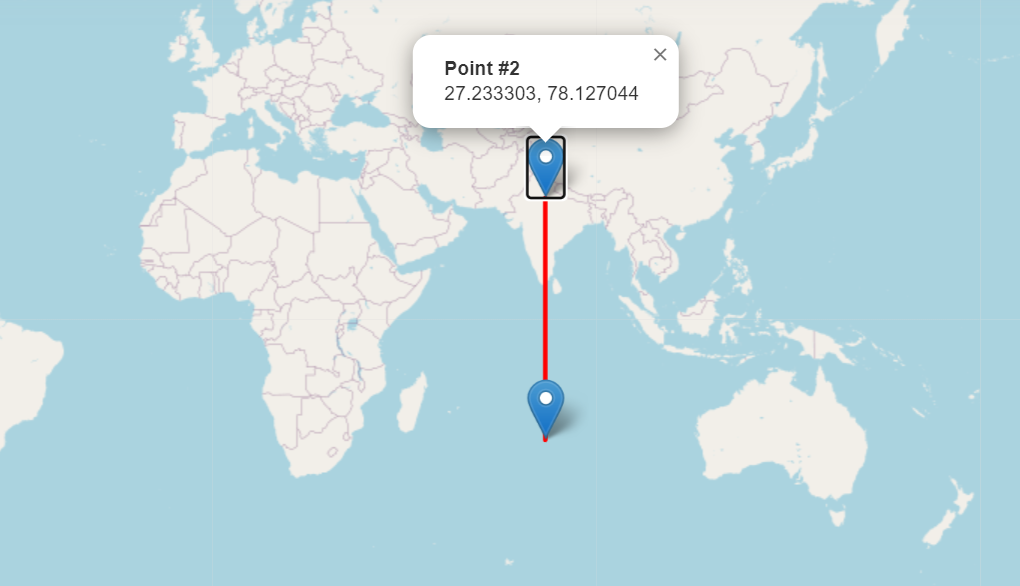

In [100]:
abs(train_data.loc[:,"Restaurant_latitude":"Delivery_location_longitude"].head())

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
0,22.745049,75.892471,22.765049,75.912471
1,12.913041,77.683237,13.043041,77.813237
2,12.914264,77.678400,12.924264,77.688400
3,11.003669,76.976494,11.053669,77.026494
4,12.972793,80.249982,13.012793,80.289982


In [101]:
train_data.loc[:,"Restaurant_latitude":"Restaurant_longitude"]= abs(train_data.loc[:,"Restaurant_latitude":"Restaurant_longitude"])
train_data.loc[:,"Delivery_location_latitude":"Delivery_location_longitude"]=abs(train_data.loc[:,"Delivery_location_latitude":"Delivery_location_longitude"])

### Calculation

In [102]:
R=6371    #here R is the radius of earth.

In [103]:
def deg_to_rad(degrees):
    return degrees*(np.pi/180)

In [104]:
def dist(lat1,lon1,lat2,lon2):
    d_lat=deg_to_rad(lat2-lat1)
    d_lon=deg_to_rad(lon2-lon1)
    a= np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))* np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
    c= 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))        # np.arctan() is used for calculating the angle in radians.
    return R*c                                        # c is the central angle between two point

In [105]:
for i in range(len(train_data)):
    train_data.loc[i,"Distance"]= round(dist(train_data.loc[i,"Restaurant_latitude"],
                                      train_data.loc[i,"Restaurant_longitude"],
                                      train_data.loc[i,"Delivery_location_latitude"],
                                      train_data.loc[i,"Delivery_location_longitude"]))

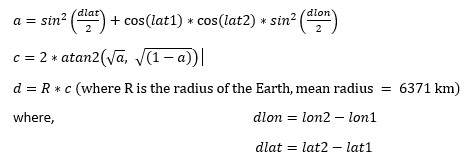

In [106]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0


In [107]:
train_data["Distance"].value_counts()

3.0     3768
12.0    3754
6.0     3751
9.0     3740
8.0     3257
11.0    3254
2.0     3237
14.0    3217
17.0    3212
5.0     3205
20.0    3194
21.0     550
16.0     541
1.0      540
7.0      540
19.0     535
13.0     534
4.0      532
10.0     511
Name: Distance, dtype: int64

<AxesSubplot:xlabel='Distance'>

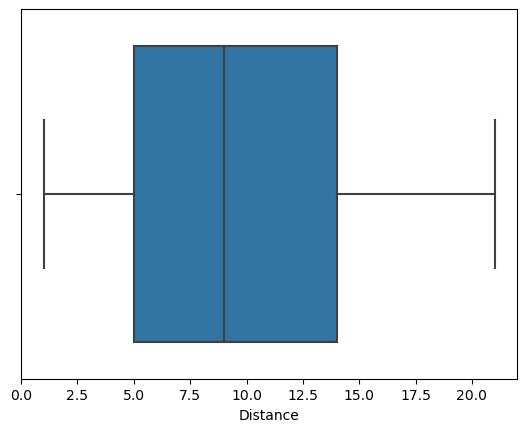

In [108]:
sns.boxplot(train_data["Distance"])

#### Now will drop the column "Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude" because I have extracted "column to avoid multicollinearity.

In [109]:
train_data.drop(columns=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)

In [110]:
train_data.shape

(41872, 15)

### Calculating Average speed 

In [111]:
train_data["Average_speed(kmph)"]= round((train_data["Distance"]*60) / train_data["Time_taken(min)"])

In [112]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph)
0,37.0,4.9,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0
1,34.0,4.5,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0
2,23.0,4.4,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0
3,38.0,4.7,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0
4,32.0,4.6,26-03-2022,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0


### Order_Date

In [113]:
#check 1 record to know how the data look like
train_data["Order_Date"][0]

'19-03-2022'

#### Now extract only date from the Order_date

In [114]:
train_data["Date"]=pd.to_datetime(train_data["Order_Date"],format="%d-%m-%Y").dt.day

In [115]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph),Date
0,37.0,4.9,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0,19
1,34.0,4.5,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0,25
2,23.0,4.4,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0,19
3,38.0,4.7,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0,5
4,32.0,4.6,26-03-2022,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0,26


#### Now extract only Month from Order_date

In [116]:
train_data["Month"]=pd.to_datetime(train_data["Order_Date"],format="%d-%m-%Y").dt.month

In [117]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph),Date,Month
0,37.0,4.9,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0,19,3
1,34.0,4.5,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0,25,3
2,23.0,4.4,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0,19,3
3,38.0,4.7,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0,5,4
4,32.0,4.6,26-03-2022,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0,26,3


#### Now extract only Year from Order_date

In [118]:
train_data["Year"]=pd.to_datetime(train_data["Order_Date"],format="%d-%m-%Y").dt.year

In [119]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph),Date,Month,Year
0,37.0,4.9,19-03-2022,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0,19,3,2022
1,34.0,4.5,25-03-2022,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0,25,3,2022
2,23.0,4.4,19-03-2022,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0,19,3,2022
3,38.0,4.7,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0,5,4,2022
4,32.0,4.6,26-03-2022,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0,26,3,2022


In [120]:
#Now drop the Order_date column
train_data.drop("Order_Date", axis=1,inplace=True)

In [121]:
pd.set_option("display.max_columns",None)    #None= means there is no limit on the number of columns to be displayed
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph),Date,Month,Year
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0,19,3,2022
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0,25,3,2022
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0,19,3,2022
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0,5,4,2022
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0,26,3,2022


### Vehicle_condition

In [122]:
train_data["Vehicle_condition"].unique()

array([2, 0, 1, 3], dtype=int64)

In [123]:
train_data["Vehicle_condition"].value_counts()

1    13851
0    13815
2    13806
3      400
Name: Vehicle_condition, dtype: int64

There is nothing to do with this vehicle_condition.

## Uni-Variate Analysis

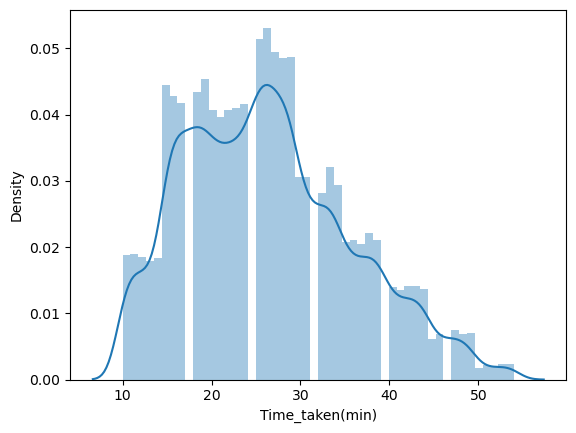

In [124]:
sns.distplot(train_data["Time_taken(min)"])
plt.show()

Here target variable is almost normally distributed.So no need of use of transformation technique for normal distribution.

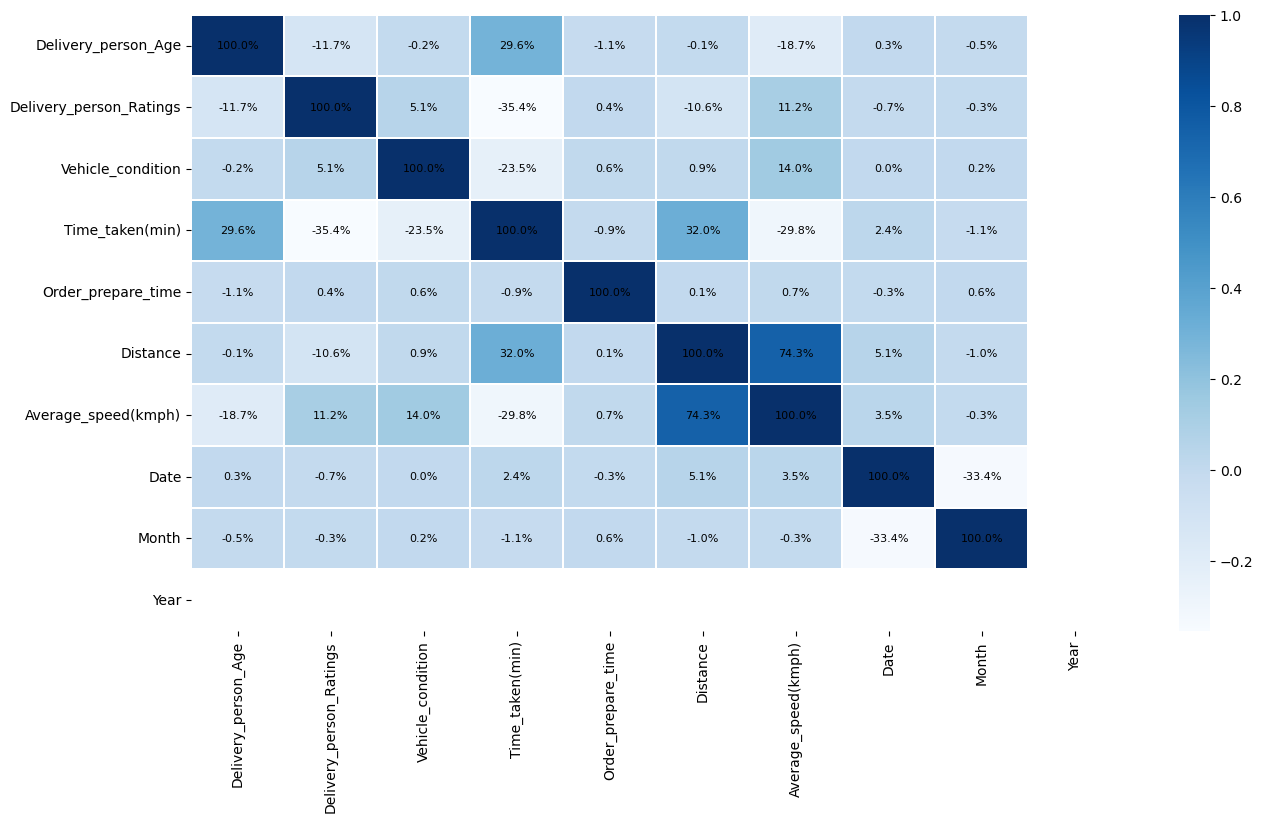

In [125]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),cmap="Blues",fmt=".1%",annot=True,annot_kws={"fontsize":8, "color": "black"},linewidth=0.01)
plt.show()

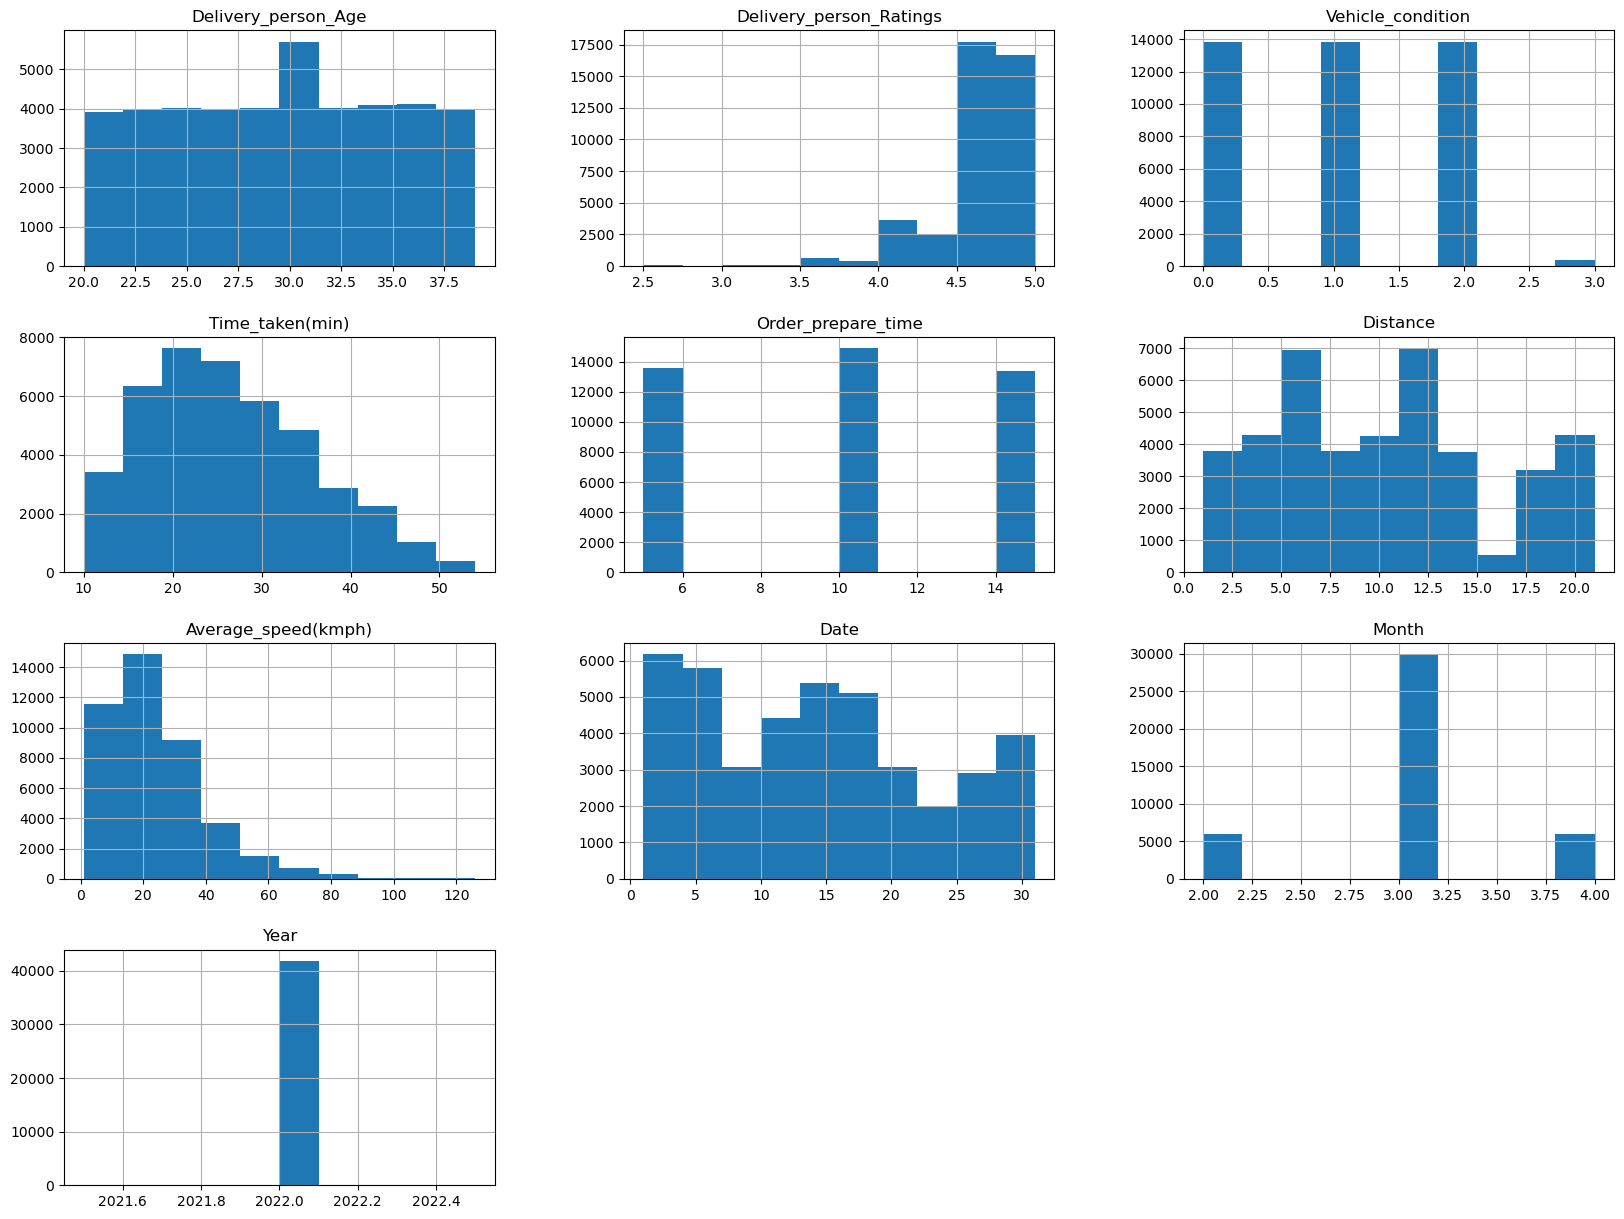

In [126]:
train_data.hist(bins=10,figsize=(20,15))
plt.show()

Delivery_person_age:
- We have maximum number of 30 age group records in datasets.
    
Delivery_person_ratings:
- Maximum delivery person got ratings within 4.6 to 5.
    
Vehicle_condition:
- We have same number of 0,1,2 vehicle condition records ,only few records from 3 vehicle condition.
    
Distance:
- Maximum people are ordering food from 5km and 12.5 km.
    
Average_speed:
- maximum people are driving at speed of 20kmph.
    

In [127]:
train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Order_prepare_time,City_code,Distance,Average_speed(kmph),Date,Month,Year
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0,15.0,INDO,3.0,8.0,19,3,2022
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0,5.0,BANG,20.0,36.0,25,3,2022
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0,15.0,BANG,2.0,5.0,19,3,2022
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0,10.0,COIMB,8.0,23.0,5,4,2022
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0,15.0,CHEN,6.0,12.0,26,3,2022


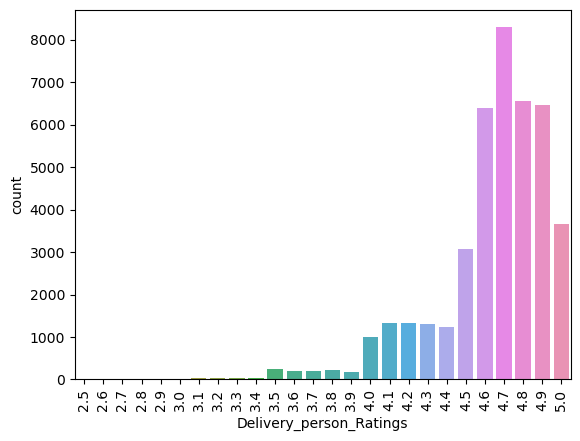

In [128]:
sns.countplot(train_data["Delivery_person_Ratings"])
plt.xticks(rotation = 90)
plt.show()

1.Maximum delivery person have got 4.7 rating for their delivery service.

## Now will do some analysis for those categorical features

In [129]:
df_categorical_features = train_data.select_dtypes(include='object')
df_categorical_features 

,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
0,Sunny,High,Snack,motorcycle,0,No,Urban,INDO
1,Stormy,Jam,Snack,scooter,1,No,Metropolitian,BANG
2,Sandstorms,Low,Drinks,motorcycle,1,No,Urban,BANG
3,Sunny,Medium,Buffet,motorcycle,1,No,Metropolitian,COIMB
4,Cloudy,High,Snack,scooter,1,No,Metropolitian,CHEN
...,...,...,...,...,...,...,...,...
41867,Windy,Jam,Drinks,motorcycle,1,No,Metropolitian,RANCHI
41868,Windy,High,Meal,motorcycle,0,No,Metropolitian,JAP
41869,Cloudy,Low,Drinks,scooter,0,No,Metropolitian,CHEN
41870,Cloudy,High,Snack,motorcycle,1,No,Metropolitian,COIMB


## Now will perform countplot for all the categorical features

Weatherconditions


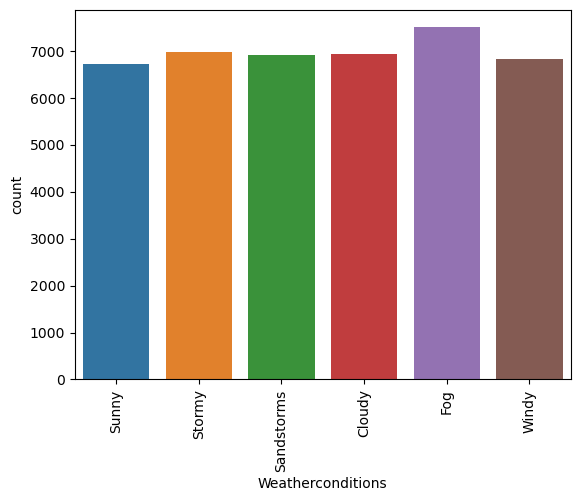

Road_traffic_density


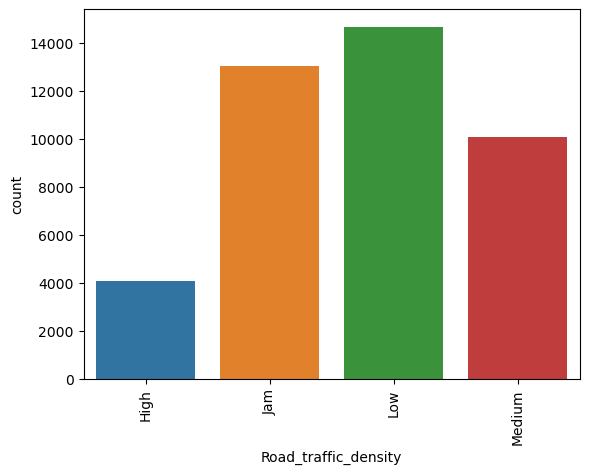

Type_of_order


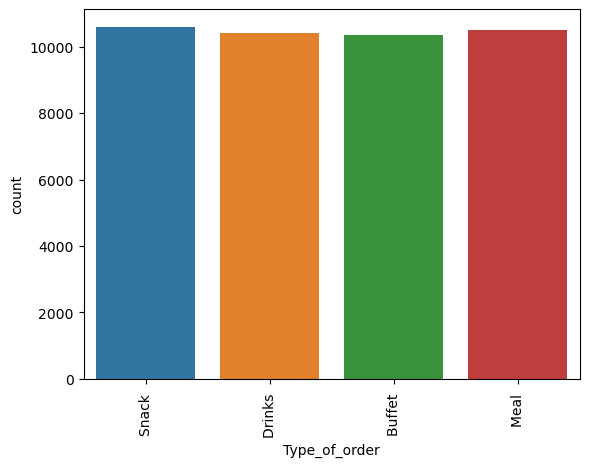

Type_of_vehicle


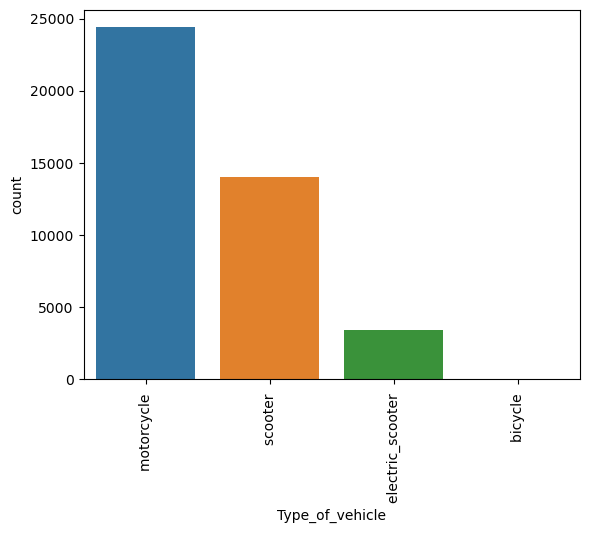

multiple_deliveries


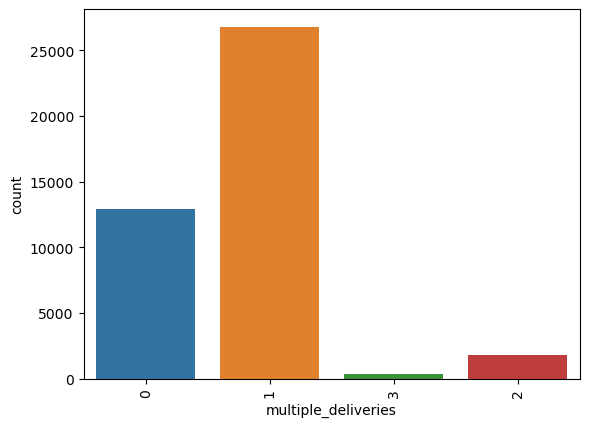

Festival


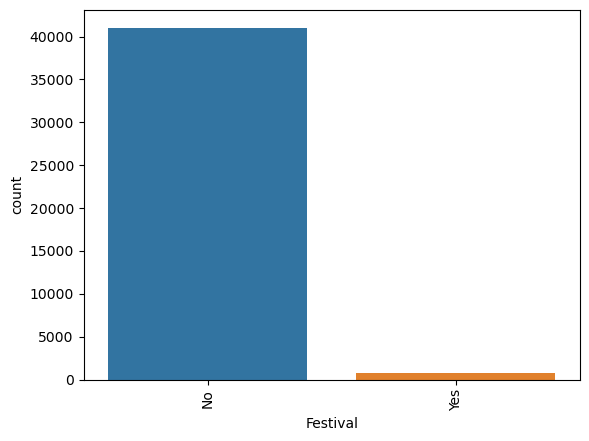

City


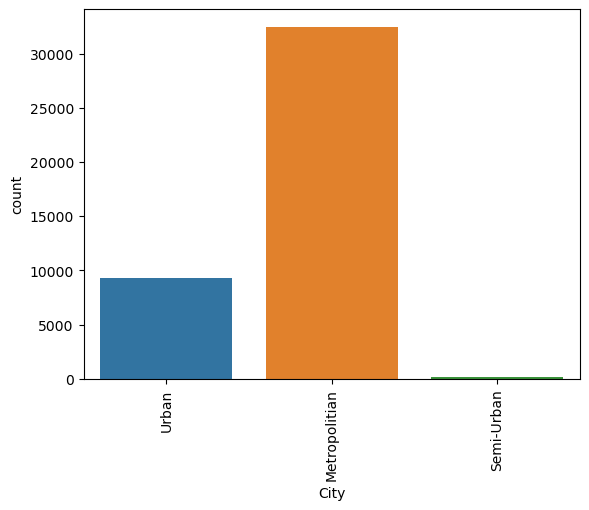

City_code


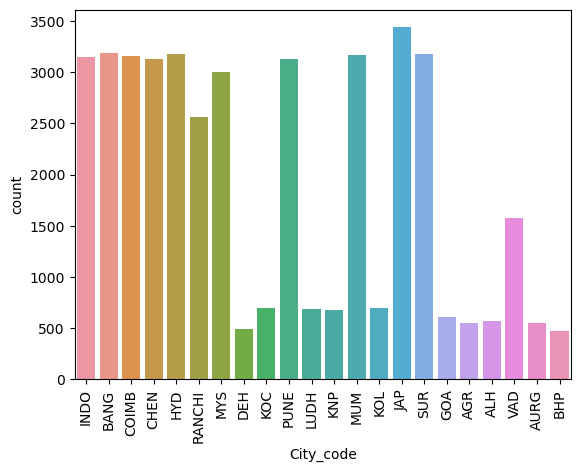

In [130]:
for i in df_categorical_features:
    print(i)
    sns.countplot(train_data[i])
    plt.xticks(rotation=90)
    plt.show()

1.Weathercondition

- India has mixed type of weathercondition like sunny,stromy,sandstroms,cloudy,fog,windy.
  Food delivery agencies have delivered their order in **fog condition** which is just higher than other weatherconditions.

2.Road_traffic_density

- Food delivery person have delivered their maximum service in Low,Jam traffic condition.

3.Type_of_food

- People are ordered different type of food in equally proportion.
4.Type_of_vehicle
- Maximum order are delivered through motercycle only.

5.multiple_deliveries

- Delivery person have delivered food with 1 multiple_deliveries with majority.

6.City

- People are ordering more food in metropolitian city where as semi_urban people are not much interested in ordering food.

7.City_code

- Maximum Food are delivered in Jaipur,Bangalore,Hydrabad,Pune,Mumbai,surat.



## Bi-variate Analysis

### Pair Plot

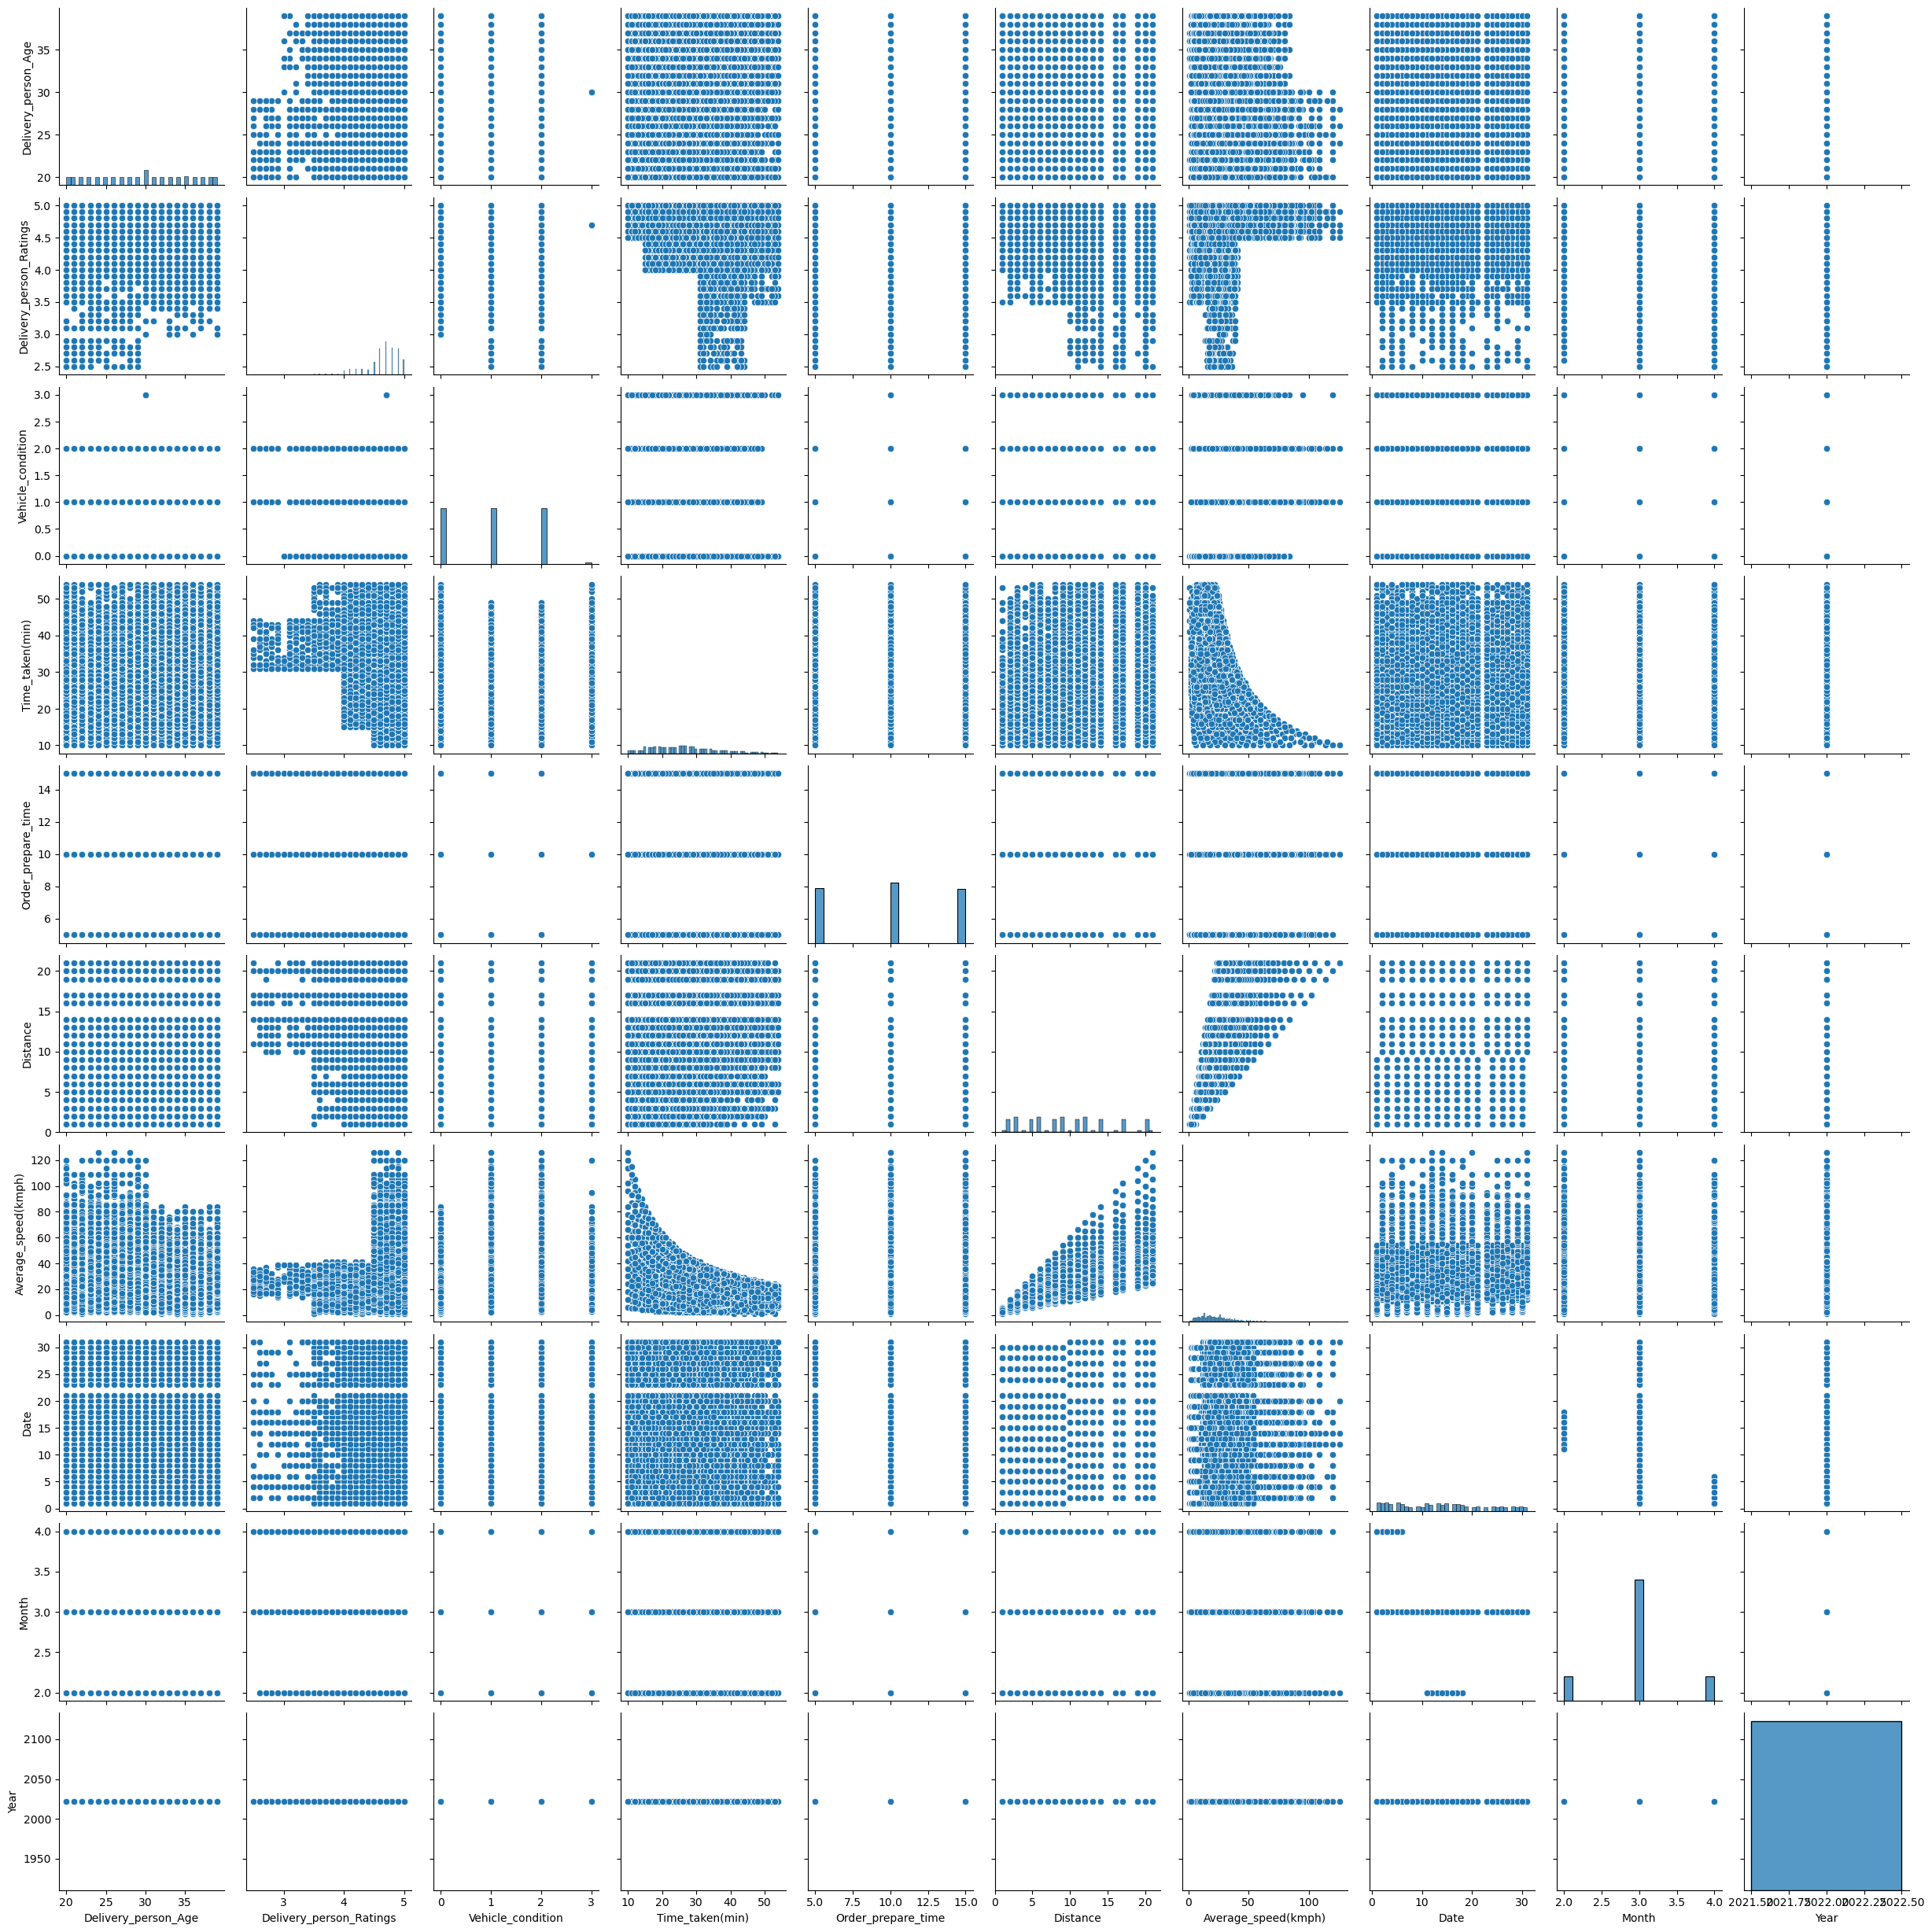

In [131]:
sns.pairplot(train_data)
plt.show()

Here we can see that our target variable follows linearity with independent variable.

### Now will compare the categorical features with Delivery time("Time_taken(min)")column and will understand how it is impacting that column

### Catplot Analysis : Delivery_person_Ratings Vs Time_taken(min) 

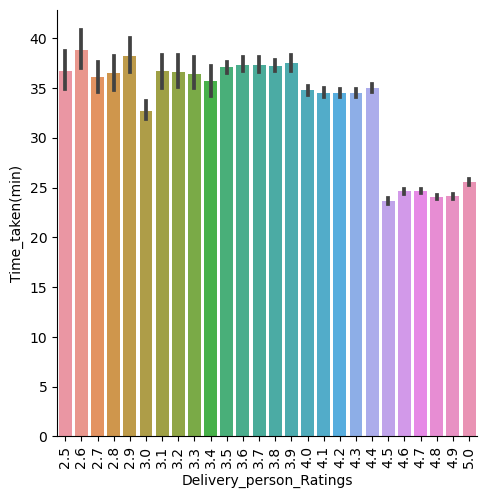

In [132]:
sns.catplot(x="Delivery_person_Ratings" ,y="Time_taken(min)",data=train_data,kind="bar")
plt.xticks(rotation = 90)
plt.show()

Delivery person who are rated with equal and above to 4.5 are taking less time for food delivery than other rated person.

### Boxplot Analysis

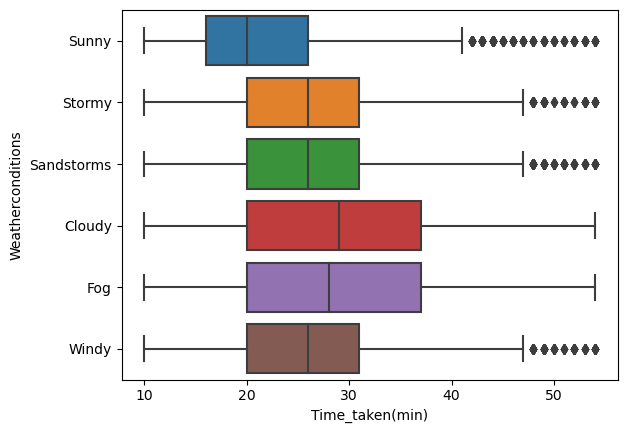

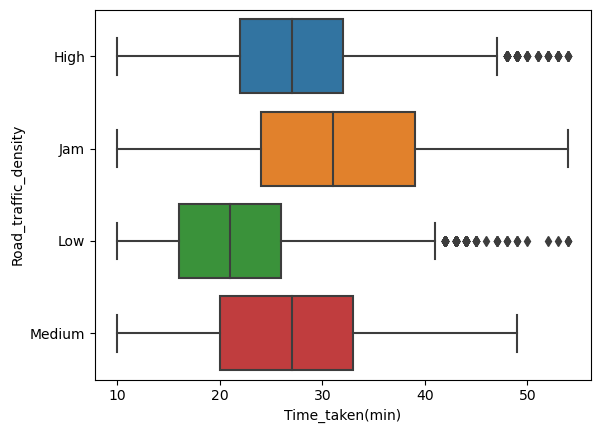

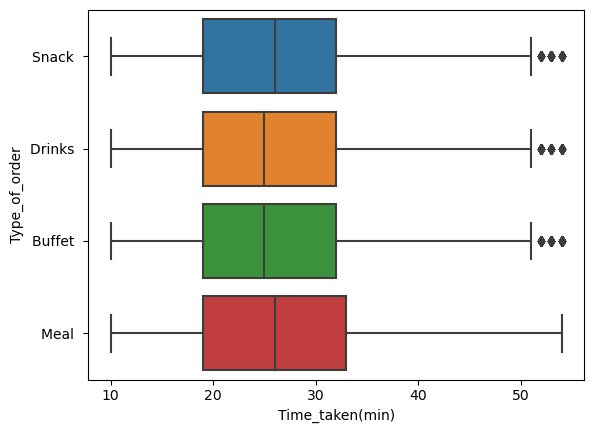

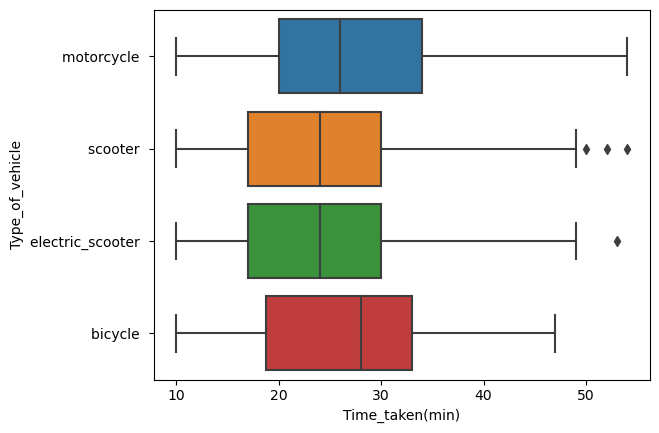

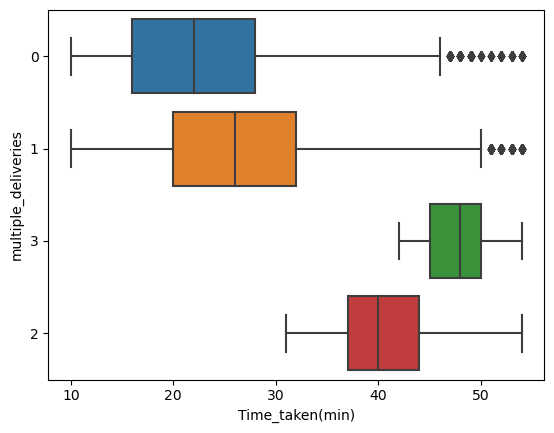

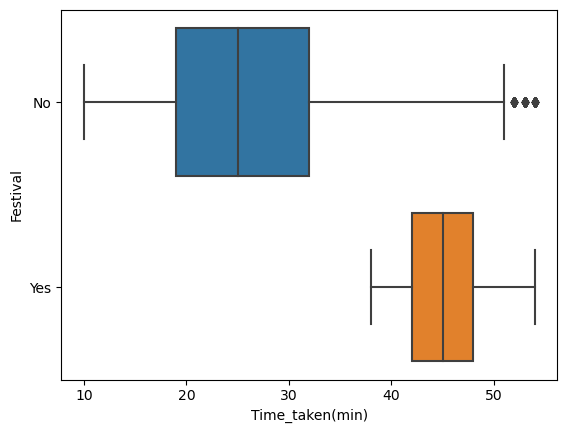

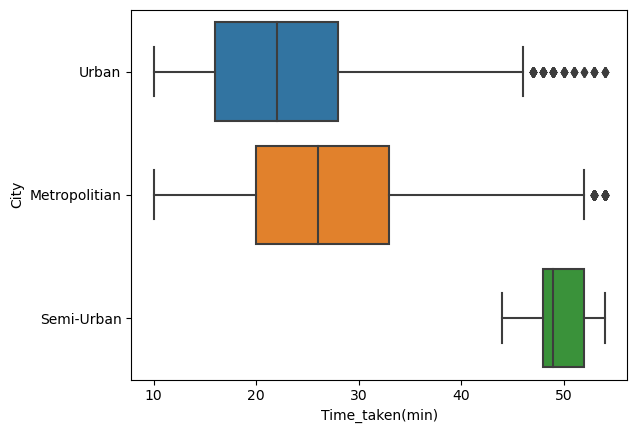

In [133]:
categorical_column=["Weatherconditions","Road_traffic_density","Type_of_order","Type_of_vehicle","multiple_deliveries","Festival","City"]
for i in categorical_column:
    sns.boxplot(x="Time_taken(min)",y=i,data=train_data)
    plt.show()

1.Weathercondition

- In Sunny condition delivery time is less compare to other condition.

2.Road_traffic_density

- Low traffic condition is the lowest delivery time taker compare to the other traffic condition.

3.Type_of_Order

- This doesn't affecting much to the delivery time.

4.Type_of_Vehicle

- Scooter,electric-scooter taking less time than motorcycle.

5.multiple_deliveries

- 0, 1 multiple_deliveries taken less delivery time than 2,3.

6.Festival

- If someone order food in festival days then it will take more time compare to normal days.

7.City

- In Urban,Metropolitian city delivery time is less than semi-urban city.

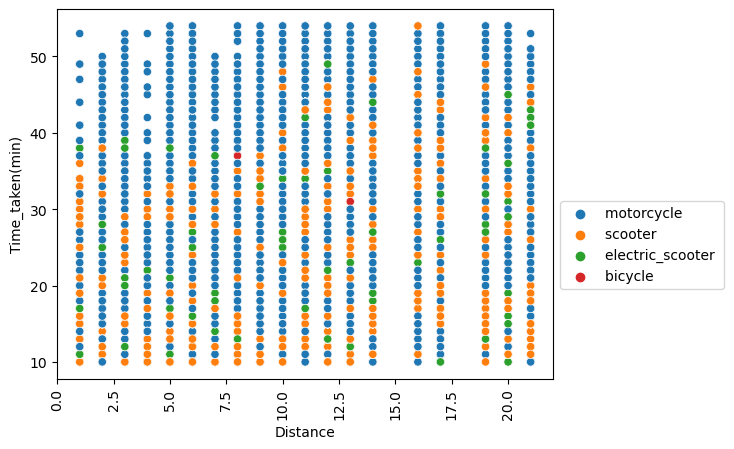

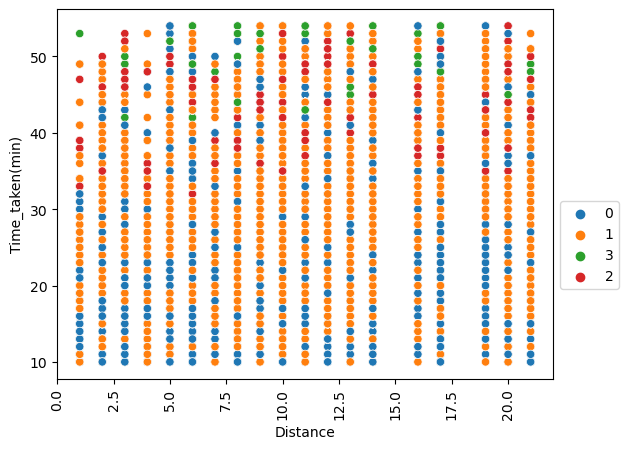

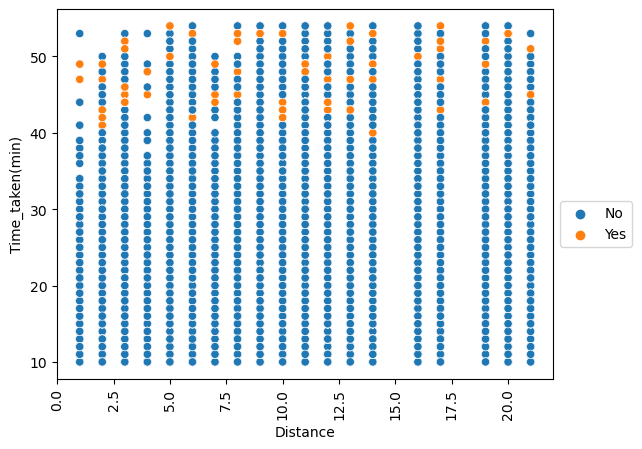

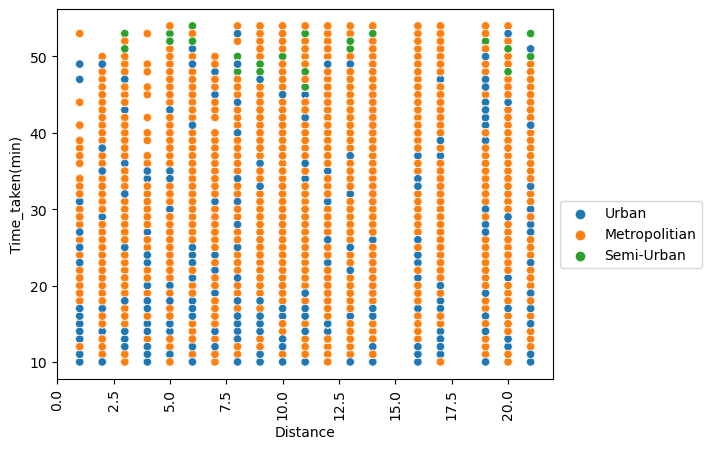

In [134]:
categorical_column=["Type_of_vehicle","multiple_deliveries","Festival","City"]
for i in categorical_column:
    sns.scatterplot(x="Distance",y="Time_taken(min)",hue=i,data=train_data)
    plt.legend( bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.show()

1. Motorcycle are travelling the far distances.
2. For faster Delivery , delivery person should carry only 0,1 multiple deliveries.
3. In festival days delivery time is more because huge volumn order.
4. In semi-urban delivery time is more.

### Lineplot:Delivery_person_Age Vs Average_speed(kmph)

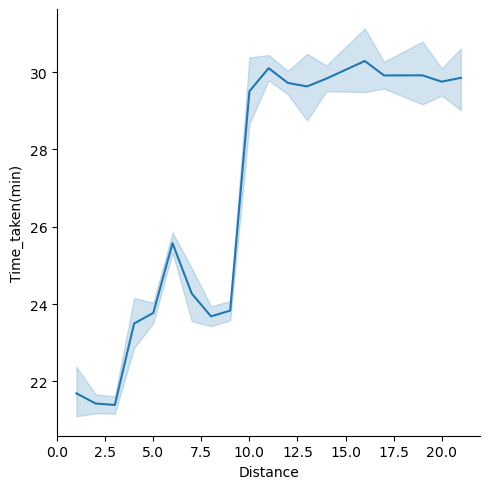

In [135]:
sns.relplot(x ="Distance", y = "Time_taken(min)",data=train_data,kind="line")
plt.show()

From above graph we can see when distance is 9km or above the delivery time increases rapidly.

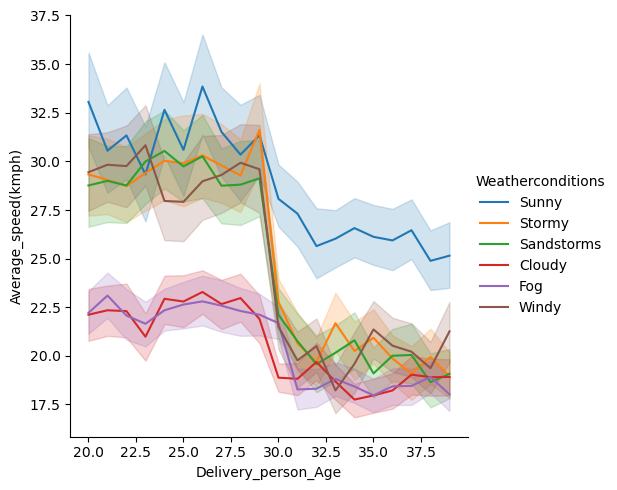

In [136]:
sns.relplot(x="Delivery_person_Age" ,y="Average_speed(kmph)",hue="Weatherconditions" ,data=train_data ,kind="line")
plt.show()

In sunny condition the average speed is more than other condition.And worst condition of food delivery is cloudy and fog condition. 

In [137]:
train_data.groupby(["Delivery_person_Age"])[["Average_speed(kmph)"]].describe()

Average_speed(kmph)                                   \
                                  count       mean        std  min   25%   
Delivery_person_Age                                                        
20.0                             1964.0  27.409878  17.958307  2.0  14.0   
21.0                             1965.0  27.315522  17.125189  2.0  15.0   
22.0                             2029.0  27.217841  17.981770  1.0  14.0   
23.0                             1939.0  26.874162  17.083527  2.0  15.0   
24.0                             2044.0  27.655577  17.814313  2.0  15.0   
25.0                             1988.0  27.313380  17.532252  2.0  15.0   
26.0                             1988.0  28.074447  18.458171  2.0  15.0   
27.0                             1973.0  27.340091  17.337375  2.0  14.0   
28.0                             2004.0  27.201098  17.845819  2.0  14.0   
29.0                             2020.0  27.547525  18.394101  2.0  14.0   
30.0                             3769.0  22.369594  14.430264  2.0  12.0   
31.0                             1943.0  20.916624  12.703270  2.0  12.0   
32.0                             2010.0  20.459701  12.543389  1.0  11.0   
33.0                             2014.0  20.653426  12.223577  2.0  12.0   
34.0                             1995.0  20.574436  12.635935  1.0  11.0   
35.0                             2099.0  20.522630  12.474334  1.0  12.0   
36.0                             2083.0  20.504561  12.222692  1.0  11.0   
37.0                             2047.0  20.625794  12.598728  1.0  11.0   
38.0                             2020.0  20.115347  12.347617  2.0  11.0   
39.0                             1978.0  20.188069  12.069266  2.0  11.0   

                                        
                      50%   75%    max  
Delivery_person_Age                     
20.0                 24.0  36.0  120.0  
21.0                 24.0  36.0  109.0  
22.0                 23.0  36.0  120.0  
23.0                 23.0  35.0  120.0  
24.0                 24.0  36.0  126.0  
25.0                 24.0  36.0  120.0  
26.0                 24.0  37.0  126.0  
27.0                 24.0  37.0  120.0  
28.0                 24.0  36.0  126.0  
29.0                 24.0  36.0  120.0  
30.0                 19.0  29.0  120.0  
31.0                 19.0  27.0   80.0  
32.0                 18.0  27.0   84.0  
33.0                 19.0  27.0   76.0  
34.0                 18.0  27.0   80.0  
35.0                 18.0  27.0   84.0  
36.0                 18.0  27.0   80.0  
37.0                 18.0  27.0   80.0  
38.0                 18.0  27.0   84.0  
39.0                 18.0  26.0   84.0

Below the age of 30 delivery person are driving faster than the above 30 people, Which ultimately affect the delivery time.

In [138]:
below_30= round(train_data[train_data["Delivery_person_Age"]<30]["Average_speed(kmph)"].mean() ,2)
above_30= round(train_data[train_data["Delivery_person_Age"]>=30]["Average_speed(kmph)"].mean(),2)
print("Avg speed of person below 30=",below_30)
print("Avg speed of person above and equal 30=",above_30)

Avg speed of person below 30= 27.4
Avg speed of person above and equal 30= 20.83


In [139]:
train_data.shape

(41872, 18)

In [140]:
#Drop "Average_speed(kmph)"        (Beacuse we can't create that column for test_data also)
train_data.drop("Average_speed(kmph)",axis=1,inplace=True)

### Converting Categorical variable to Numerical Variable

In [141]:
# Now will perform encoding to convert categorical data in to numbers
train_data["Festival"].replace({"No":0,"Yes":1},inplace=True)

In [142]:
new_train_data= pd.get_dummies(columns=["Weatherconditions","Road_traffic_density","Type_of_order","Type_of_vehicle","City"],data=train_data,drop_first=True)

In [143]:
new_train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min),Order_prepare_time,City_code,Distance,Date,Month,Year,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,37.0,4.9,2,0,0,24.0,15.0,INDO,3.0,19,3,2022,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,34.0,4.5,2,1,0,33.0,5.0,BANG,20.0,25,3,2022,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,23.0,4.4,0,1,0,26.0,15.0,BANG,2.0,19,3,2022,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,38.0,4.7,0,1,0,21.0,10.0,COIMB,8.0,5,4,2022,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,32.0,4.6,1,1,0,30.0,15.0,CHEN,6.0,26,3,2022,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [144]:
new_train_data.shape

(41872, 28)

In [145]:
new_train_data["City_code"].unique()

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AGR', 'ALH', 'VAD', 'AURG', 'BHP'], dtype=object)

### Here we will perform LabelEncoder for City_code

In [146]:
from sklearn.preprocessing import LabelEncoder

In [147]:
le = LabelEncoder()
new_train_data["City_code"] = le.fit_transform(new_train_data["City_code"])

In [148]:
new_train_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,Time_taken(min),Order_prepare_time,City_code,Distance,Date,Month,Year,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,37.0,4.9,2,0,0,24.0,15.0,10,3.0,19,3,2022,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,34.0,4.5,2,1,0,33.0,5.0,3,20.0,25,3,2022,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,23.0,4.4,0,1,0,26.0,15.0,3,2.0,19,3,2022,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,38.0,4.7,0,1,0,21.0,10.0,6,8.0,5,4,2022,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,32.0,4.6,1,1,0,30.0,15.0,5,6.0,26,3,2022,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [149]:
new_train_data.shape

(41872, 28)

#### Before coming to model predicting we need to drop some feature which are not telling much information about the target variables.

In [150]:
new_train_data.drop(["Order_prepare_time","Date","Month","Year"],axis=1,inplace=True)

In [151]:
new_train_data.shape

(41872, 24)

## Split the dataframe into X & y

In [152]:
# Separate object for Predictors 
X = new_train_data.drop("Time_taken(min)",axis=1)

# Separate object for target feature 
y = new_train_data["Time_taken(min)"]

In [153]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,City_code,Distance,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,37.0,4.9,2,0,0,10,3.0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,34.0,4.5,2,1,0,3,20.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,23.0,4.4,0,1,0,3,2.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1
3,38.0,4.7,0,1,0,6,8.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,32.0,4.6,1,1,0,5,6.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [154]:
y.head()

0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64

In [155]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (41872, 23) 
y Shape = (41872,)


## Performing Train Test Split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =14)

In [157]:
# dimension of the datasets
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (33497, 23)
X_test = (8375, 23)
y_train = (33497,)
y_test = (8375,)


## Linear Regression

In [158]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [159]:
mse_train=mean_squared_error(y_train,y_train_pred)
mse_test=mean_squared_error(y_test,y_test_pred)

In [160]:
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [161]:
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  6.032462312201066
rmse_test =  6.037265973913092


In [162]:
train_score=r2_score(y_train,y_train_pred)
test_score=r2_score(y_test,y_test_pred)
print("train_score=",train_score)
print("test_score=",test_score)

train_score= 0.5866687476699837
test_score= 0.5860354018712868


## DecisionTree 

In [163]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  0.14883291781137312
rmse_test =  5.642654715540015
train_score =  0.999748402106156
test_score =  0.6383824201626687


## RandomForest

In [164]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  1.5283632272996492
rmse_test =  4.092335177320629
train_score =  0.9734684777073956
test_score =  0.8097936650442019


## First we want to build the base model and which ever model is giving me best accuracy based on that we want to perfrom Hypertuning technique

In [165]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,1000,200)]
# Number of features to consider at every split
max_features = ["auto","sqrt","log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Minmum samples required to split the node
min_samples_split = [2,5,20,35,50]
# Minmum no of samples required to each leaf to split                       
min_samples_leaf = [2,5,10,15,18]

In [166]:
# create the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [167]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [168]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15, 18],
                                        'min_samples_split': [2, 5, 20, 35, 50],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900]},
                   random_state=0)

In [169]:
# best Parameter
rf_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 17}

In [170]:
RF = RandomForestRegressor(n_estimators =700,min_samples_split = 20,min_samples_leaf =2,max_features ='auto',max_depth = 17)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score)
print('test_score = ',test_score)

rmse_train =  3.2448532649762782
rmse_test =  3.979927036370533
train_score =  0.8804088246837615
test_score =  0.8200993202866843


In [171]:
# Now we are going to perform for Test Data

In [172]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [173]:
test_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
dtype: int64

In [174]:
test_data=test_data.replace("NaN",np.nan,regex=True)
test_data.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

In [175]:
test_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
dtype: object

In [176]:
test_data.shape

(11399, 19)

#### Now will perfrom the Preprocessing Technique for Test Data

In [177]:
# EDA

#Time_Orderd  

def calculate_time_diff(df):                                    
    df["Time_Orderd"] = pd.to_timedelta(df["Time_Orderd"])      
    df["Time_Order_picked"] = pd.to_timedelta(df["Time_Order_picked"])
    df["Order_prepare_time"] = (df["Time_Order_picked"]-df["Time_Orderd"]).dt.total_seconds() / 60
    
calculate_time_diff(test_data)

#create a new column name "Order_prepare_time"
test_data["Order_prepare_time"].value_counts()
test_data["Order_prepare_time"].replace({-1425.0: 15.0, -1430.0: 10.0,-1435.0: 5.0}  , inplace=True)
test_data.loc[:,["Type_of_order","Order_prepare_time"]]
test_data.groupby("Type_of_order")[["Order_prepare_time"]].describe()

#Impute Order_prepare_time
test_data["Order_prepare_time"].fillna(10.0,inplace=True)

#Now drop "Time_Orderd","Time_Order_picked" column
test_data.drop(columns=["Time_Orderd","Time_Order_picked"],axis=1,inplace=True)

#change the Datatype And Impute null values

#Delivery_person_Age
test_data["Delivery_person_Age"]=test_data["Delivery_person_Age"].astype(float)
test_data["Delivery_person_Age"]=test_data["Delivery_person_Age"].fillna(round(test_data["Delivery_person_Age"].mean()))

above_age_40_idx=test_data[test_data["Delivery_person_Age"]>40].index
above_age_40_idx
#drop record
test_data.drop(above_age_40_idx,axis=0,inplace=True)
#reset index
test_data.reset_index(drop=True,inplace=True)


#Delivery_person_Ratings

test_data["Delivery_person_Ratings"]=test_data["Delivery_person_Ratings"].astype(float)
test_data["Delivery_person_Ratings"]=test_data["Delivery_person_Ratings"].fillna(test_data["Delivery_person_Ratings"].median())
test_data[train_data["Delivery_person_Ratings"]<2.0]

below_18_age_idx=test_data[test_data["Delivery_person_Age"]==15].index
below_18_age_idx
#drop record
test_data.drop(below_18_age_idx,axis=0,inplace=True)
#reset index
test_data.reset_index(drop=True,inplace=True)

#Weathercondition
test_data["Weatherconditions"]=test_data["Weatherconditions"].fillna(test_data["Weatherconditions"].mode()[0])
test_data["Weatherconditions"]=test_data["Weatherconditions"].apply(lambda x:x.split()[-1])

#Road_traffic_density
test_data["Road_traffic_density"]=test_data["Road_traffic_density"].fillna(test_data["Road_traffic_density"].mode()[0])
test_data["Road_traffic_density"]=test_data["Road_traffic_density"].str.strip()

#multiple_deliveries
test_data["multiple_deliveries"]=test_data["multiple_deliveries"].fillna(test_data["multiple_deliveries"].mode()[0])

#Festival
test_data["Festival"]=test_data["Festival"].str.strip()
test_data["Festival"]=test_data["Festival"].fillna(test_data["Festival"].mode()[0])

#City
test_data["City"]=test_data["City"].str.strip()
test_data["City"]=test_data["City"].fillna(test_data["City"].mode()[0])


In [178]:
test_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Order_prepare_time             0
dtype: int64

In [179]:
#Feature Engineering

#Delivery_person_ID
test_data["Delivery_person_ID"]=test_data["Delivery_person_ID"].str.strip()
test_data["City_code"]=test_data["Delivery_person_ID"].apply(lambda x: x.split("RES")[0])

#Drop "ID","Delivery_person_ID" 
test_data.drop(columns=["ID","Delivery_person_ID"],axis=1,inplace=True)

#Calculating distance between Restaurant and Delivery_location

wrong_coodinate=test_data[test_data["Restaurant_latitude"]==0.0].index
wrong_coodinate

#drop record
test_data.drop(wrong_coodinate,axis=0,inplace=True)
#Reset index
test_data.reset_index(drop=True,inplace=True)

#make the absolute co-ordinate
test_data.loc[:,"Restaurant_latitude":"Restaurant_longitude"]= abs(test_data.loc[:,"Restaurant_latitude":"Restaurant_longitude"])
test_data.loc[:,"Delivery_location_latitude":"Delivery_location_longitude"]=abs(test_data.loc[:,"Delivery_location_latitude":"Delivery_location_longitude"])

R=6371

def deg_to_rad(degrees):
    return degrees*(np.pi/180)

def dist(lat1,lon1,lat2,lon2):
    d_lat=deg_to_rad(lat2-lat1)
    d_lon=deg_to_rad(lon2-lon1)
    a= np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1))* np.cos(deg_to_rad(lat2))*np.sin(d_lon/2)**2
    c= 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))        # np.arctan() is used for calculating the angle in radians.
    return R*c

for i in range(len(test_data)):
    test_data.loc[i,"Distance"]= round(dist(test_data.loc[i,"Restaurant_latitude"],
                                      test_data.loc[i,"Restaurant_longitude"],
                                      test_data.loc[i,"Delivery_location_latitude"],
                                      test_data.loc[i,"Delivery_location_longitude"]))
        
test_data.drop(columns=["Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)


#Order_Date
test_data["Date"]=pd.to_datetime(test_data["Order_Date"],format="%d-%m-%Y").dt.day
test_data["Month"]=pd.to_datetime(test_data["Order_Date"],format="%d-%m-%Y").dt.month
test_data["Year"]=pd.to_datetime(test_data["Order_Date"],format="%d-%m-%Y").dt.year

#Now drop the Order_date column
test_data.drop("Order_Date", axis=1,inplace=True)

# Now will perform encoding to convert categorical data in to numbers
test_data["Festival"].replace({"No":0,"Yes":1},inplace=True)

#pd.get_dummies
new_test_data= pd.get_dummies(columns=["Weatherconditions","Road_traffic_density","Type_of_order","Type_of_vehicle","City"],data=test_data,drop_first=True)

#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_test_data["City_code"] = le.fit_transform(new_test_data["City_code"])

#Drop some feature that not giving much imformation about target variable
new_test_data.drop(["Order_prepare_time","Date","Month","Year"],axis=1,inplace=True)

print(new_test_data.shape)

(10511, 23)


In [180]:
new_test_data.head()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Festival,City_code,Distance,Weatherconditions_Fog,Weatherconditions_Sandstorms,Weatherconditions_Stormy,Weatherconditions_Sunny,Weatherconditions_Windy,Road_traffic_density_Jam,Road_traffic_density_Low,Road_traffic_density_Medium,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,30.0,4.7,3,1,0,6,6.0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0
1,28.0,4.6,0,1,0,3,17.0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2,23.0,4.5,0,1,0,11,13.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
3,21.0,4.8,1,1,0,11,13.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
4,31.0,4.6,2,1,0,5,17.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0


In [181]:
Predicted_Time_taken = pd.Series(RF.predict(new_test_data))

In [182]:
len(RF.predict(new_test_data))

10511

In [183]:
test_data.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Order_prepare_time,City_code,Distance,Date,Month,Year
0,30.0,4.7,Sunny,Low,3,Drinks,electric_scooter,1,0,Metropolitian,10.0,COIMB,6.0,30,3,2022
1,28.0,4.6,Windy,Jam,0,Snack,motorcycle,1,0,Metropolitian,5.0,BANG,17.0,29,3,2022
2,23.0,4.5,Stormy,Jam,0,Drinks,motorcycle,1,0,Metropolitian,10.0,JAP,13.0,10,3,2022
3,21.0,4.8,Fog,Medium,1,Meal,scooter,1,0,Metropolitian,5.0,JAP,13.0,2,4,2022
4,31.0,4.6,Sunny,Medium,2,Drinks,scooter,1,0,Metropolitian,15.0,CHEN,17.0,27,3,2022
5,26.0,4.7,Fog,Low,0,Drinks,motorcycle,1,0,Metropolitian,10.0,GOA,2.0,15,2,2022
6,23.0,4.8,Windy,Low,2,Buffet,scooter,0,0,Urban,5.0,BANG,3.0,1,4,2022
7,26.0,4.8,Windy,Medium,0,Meal,motorcycle,1,0,Metropolitian,5.0,KOL,8.0,13,2,2022
8,35.0,4.9,Cloudy,Jam,2,Snack,scooter,1,0,Metropolitian,15.0,MYS,14.0,2,3,2022
9,23.0,4.9,Fog,Jam,1,Meal,motorcycle,0,0,Metropolitian,10.0,HYD,5.0,5,4,2022


In [184]:
round(Predicted_Time_taken[0:10])

0    16.0
1    30.0
2    29.0
3    30.0
4    22.0
5    19.0
6    13.0
7    22.0
8    41.0
9    23.0
dtype: float64

### Conclusion Statement

If delivery person age is  28 ,rating is 4.6 ,multiple deliveries is 1,distance is 17 km, weather condition is windy , traffic condition is jam with excellent vehicle condition then by using my model I can say that the time taken by the delivery person will range between 26 min to 34 min with 95% confident interval.